# Modeling Workshop

In [ ]:
import numpy as np
import pandas as pd
import IPython.display

from google.colab import drive
drive.mount('/content/drive')

%cd "/content/drive/Shareddrives/ADSC GM Project - Spring 2024/PUBLIC/Modeling Workshop/Data"

MessageError: Error: credential propagation was unsuccessful

# Part 1: Machine Learning

Machine learning is a subset of artificial intelligence that empowers computers to learn and improve from experience without being explicitly programmed. Machine learning algorithms leverage data to identify patterns, make predictions, or optimize performance over time. The process involves training a model on a dataset, allowing it to recognize and adapt to patterns, and then using this trained model to make predictions or decisions when exposed to new, unseen data.

Different algorithms have distinct strengths and weaknesses, and their effectiveness can vary based on the nature of the data and the task. A thoughtful and informed model selection process can lead to improved accuracy, efficiency, and generalization of the model.

## Part 1.1: Supervised vs Unsupervised Learning

Supervised learning involves training a model on a labeled dataset, where the algorithm learns to map input data to corresponding output labels. The goal is for the model to make accurate predictions or decisions when given new, unseen data.

Unsupervised learning deals with unlabeled data. The algorithm explores the data's inherent structure or patterns without explicit guidance on what to find. It's like giving the algorithm a set of data and letting it discover the relationships or groupings on its own, without predefined categories.

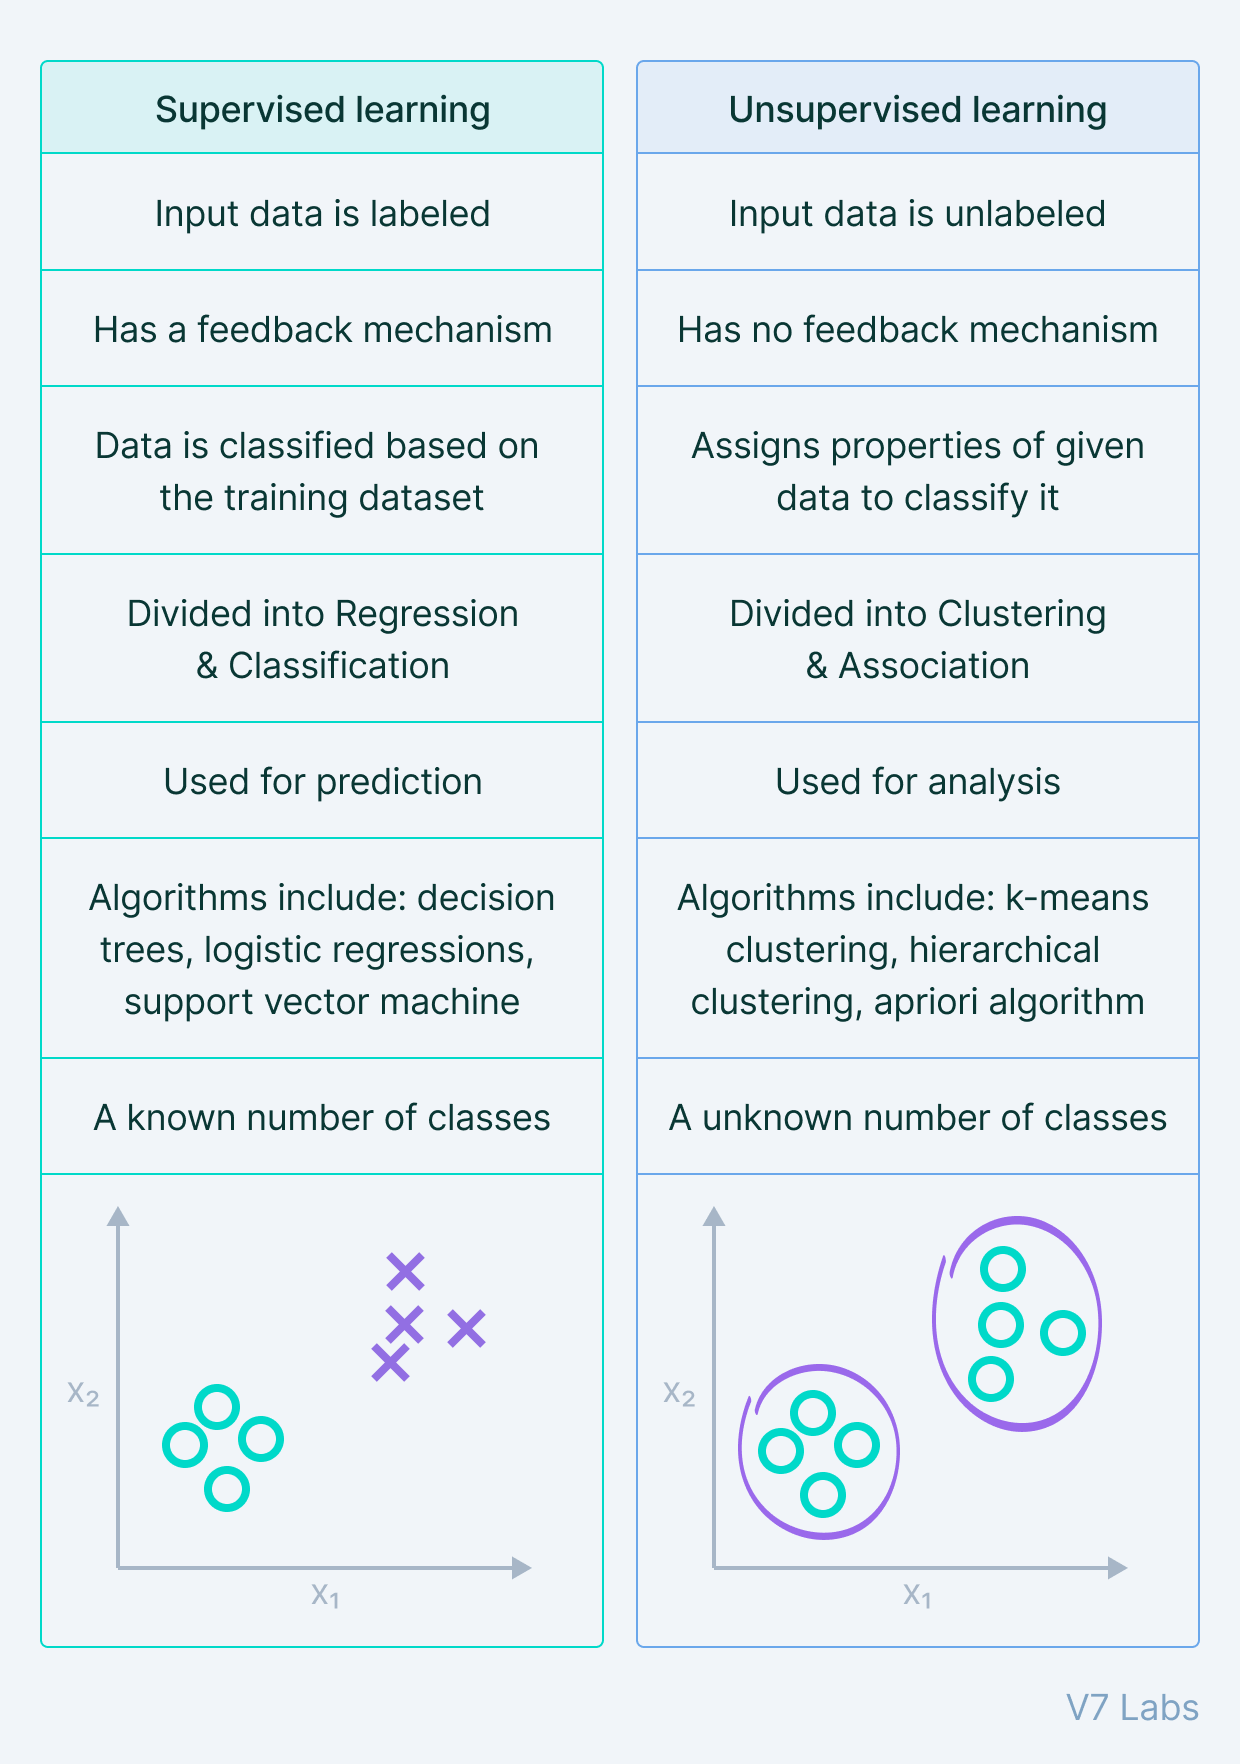

In [ ]:
IPython.display.Image('Supervised_Unsupervised.png', width=500)

## Part 1.2: Train-Test Split

Splitting the data into training and test sets is a crucial step in machine learning. The primary purpose of splitting the data is to evaluate the model's performance on data it has never seen before. The test set serves as new, unseen data, allowing you to assess how well your model generalizes to real-world scenarios.

It is also often recommended to use a validation set before the test set, especially when tuning hyperparameters or selecting between different machine learning models. The validation set helps you assess how well the model performs on data it was not trained on, guiding the selection of hyperparameters or models that generalize well, while also allowing the test set to remain a truly objective measure for evaluation.

The exact split between training and testing sets varies, but typical splits include 70-30 for train-test, or 80-20. (assuming no validation set in between).

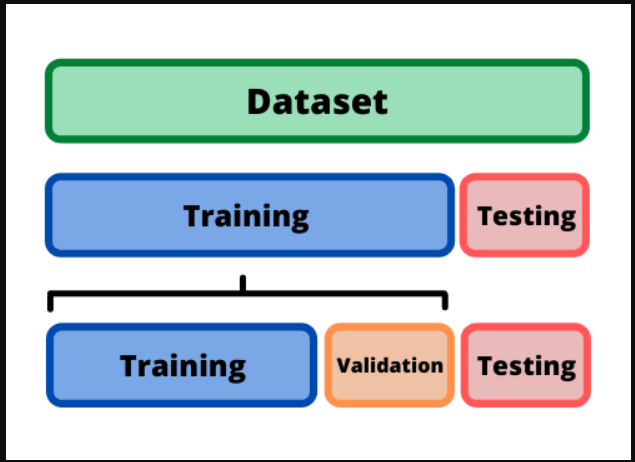

In [ ]:
IPython.display.Image("train_test.png")

## Part 1.3: Walkthrough

We will use the Households & Vehicles dataset from the NHTS surveys for this walkthrough. Note that this is a very simple example and that you will most likely have to do much more work!

We will be predicting whether a household has a hybrid vehicle or not based on various family variables. For simplicity, we will only use a small subset of the features and won't do too much preprocessing (make sure you don't skimp on preprocessing in your projects though!)

We will first prepare the dataset by doing the merging. This is the same code from last week's workshop. If you ever need assistance with these steps, you can always refer to last week's preprocessing guide!

In [ ]:
household_data = pd.read_csv("hhpub.csv")
vehicle_data = pd.read_csv("vehpub.csv")
df = pd.merge(vehicle_data, household_data, on='HOUSEID', how='inner')

# Identify duplicate columns
duplicates = [col for col in df.columns if col.endswith(('_x'))]

# Drop the duplicate columns
df = df.drop(columns=duplicates)

# Rename columns with '_y' suffix by removing the suffix
df = df.rename(columns={col: col.replace('_y', '') for col in df.columns})


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14684 entries, 0 to 14683
Data columns (total 55 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HOUSEID           14684 non-null  int64  
 1   VEHID             14684 non-null  int64  
 2   VEHYEAR           14684 non-null  int64  
 3   MAKE              14684 non-null  int64  
 4   VEHTYPE           14684 non-null  int64  
 5   VEHFUEL           14684 non-null  int64  
 6   VEHCOMMERCIAL     14684 non-null  int64  
 7   VEHCOM_RS         14684 non-null  int64  
 8   VEHCOM_DEL        14684 non-null  int64  
 9   VEHCOM_OTH        14684 non-null  int64  
 10  COMMERCIALFREQ    14684 non-null  int64  
 11  HHVEHUSETIME_RS   14684 non-null  int64  
 12  HHVEHUSETIME_DEL  14684 non-null  int64  
 13  HHVEHUSETIME_OTH  14684 non-null  int64  
 14  VEHOWNED          14684 non-null  int64  
 15  WHOMAIN           14684 non-null  int64  
 16  VEHCASEID         14684 non-null  int64 

Note that a household can have multiple vehicles. Since we are only interested if they have AT LEAST ONE hybrid vehicle, we should group vehicles by household and add another column signifying if each group contains a hybrid vehicle.

In [ ]:
df

HOUSEID  VEHID  VEHYEAR  MAKE  VEHTYPE  VEHFUEL  VEHCOMMERCIAL  \
0      9000013002      1     2015    48        3        1              2   
1      9000013002      2     2019    48        3        1              2   
2      9000013016      1     2011    49        1        1              2   
3      9000013039      1     2015    35        1        1              2   
4      9000013041      1     2014    34        1        1              2   
...           ...    ...      ...   ...      ...      ...            ...   
14679  9000218013      1     2018    30        3        1              2   
14680  9000218021      1     2016    12        3        1              1   
14681  9000218034      1     2018    37        3        1              2   
14682  9000218034      2     2003    49        4        1              2   
14683  9000218040      1     2020     7        4        1              2   

       VEHCOM_RS  VEHCOM_DEL  VEHCOM_OTH  ...  URBAN  URBANSIZE  URBRUR  \
0             -1          -1          -1  ...      1          4       1   
1             -1          -1          -1  ...      1          4       1   
2             -1          -1          -1  ...      1          2       1   
3             -1          -1          -1  ...      1          4       1   
4             -1          -1          -1  ...      1          3       1   
...          ...         ...         ...  ...    ...        ...     ...   
14679         -1          -1          -1  ...      1          1       1   
14680          2           2           1  ...      4          6       2   
14681         -1          -1          -1  ...      4          6       2   
14682         -1          -1          -1  ...      4          6       2   
14683         -1          -1          -1  ...      4          6       2   

       PPT517  YOUNGCHILD  RESP_CNT  URBRUR_2010  TDAYDATE  WRKCOUNT  \
0           2           0         4            1    202202         1   
1           2           0         4            1    202202         1   
2           0           0         2            1    202202         2   
3           2           0         4            1    202201         1   
4           0           0         1            1    202201         1   
...       ...         ...       ...          ...       ...       ...   
14679       0           0         2            1    202301         0   
14680       0           0         1            2    202212         0   
14681       0           0         2            2    202212         0   
14682       0           0         2            2    202212         0   
14683       0           0         1            2    202212         1   

       STRATUMID  
0           1021  
1           1021  
2           1021  
3           1021  
4           1021  
...          ...  
14679       1031  
14680       1032  
14681       1032  
14682       1032  
14683       1032  

[14684 rows x 55 columns]

According to the Codebook, HYBRID has two categories: 1 for Yes, and 2 for No. Traditionally, in classification, we use 0 for No and 1 for Yes, so while we add the extra column, we will also transform the Noes to 0.

In [ ]:
df['HAS_HYBRID'] = df.groupby('HOUSEID')['HYBRID'].transform(lambda x: 1 if (x == 1).any() else 0)
df

HOUSEID  VEHID  VEHYEAR  MAKE  VEHTYPE  VEHFUEL  VEHCOMMERCIAL  \
0      9000013002      1     2015    48        3        1              2   
1      9000013002      2     2019    48        3        1              2   
2      9000013016      1     2011    49        1        1              2   
3      9000013039      1     2015    35        1        1              2   
4      9000013041      1     2014    34        1        1              2   
...           ...    ...      ...   ...      ...      ...            ...   
14679  9000218013      1     2018    30        3        1              2   
14680  9000218021      1     2016    12        3        1              1   
14681  9000218034      1     2018    37        3        1              2   
14682  9000218034      2     2003    49        4        1              2   
14683  9000218040      1     2020     7        4        1              2   

       VEHCOM_RS  VEHCOM_DEL  VEHCOM_OTH  ...  URBANSIZE  URBRUR  PPT517  \
0             -1          -1          -1  ...          4       1       2   
1             -1          -1          -1  ...          4       1       2   
2             -1          -1          -1  ...          2       1       0   
3             -1          -1          -1  ...          4       1       2   
4             -1          -1          -1  ...          3       1       0   
...          ...         ...         ...  ...        ...     ...     ...   
14679         -1          -1          -1  ...          1       1       0   
14680          2           2           1  ...          6       2       0   
14681         -1          -1          -1  ...          6       2       0   
14682         -1          -1          -1  ...          6       2       0   
14683         -1          -1          -1  ...          6       2       0   

       YOUNGCHILD  RESP_CNT  URBRUR_2010  TDAYDATE  WRKCOUNT  STRATUMID  \
0               0         4            1    202202         1       1021   
1               0         4            1    202202         1       1021   
2               0         2            1    202202         2       1021   
3               0         4            1    202201         1       1021   
4               0         1            1    202201         1       1021   
...           ...       ...          ...       ...       ...        ...   
14679           0         2            1    202301         0       1031   
14680           0         1            2    202212         0       1032   
14681           0         2            2    202212         0       1032   
14682           0         2            2    202212         0       1032   
14683           0         1            2    202212         1       1032   

       HAS_HYBRID  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
14679           0  
14680           0  
14681           0  
14682           0  
14683           0  

[14684 rows x 56 columns]

Notice that HAS_HYBRID has more Yes responses than No. This is because all of the households with at least one hybrid vehicle have all their rows set to 1 for HAS_HYBRID (household contains hybrid), but only the rows involving hybrid vehicles are set to 1 for HYBRID (particular vehicle in household is hybrid).  

We therefore should group the families. We can do this because the household part of the statistics are the same for each vehicle it owns, so combining the vehicles won't cause us to lose household data (we don't care about particular vehicle data in this task).

In [ ]:
df["HYBRID"].value_counts()

2    13941
1      743
Name: HYBRID, dtype: int64

In [ ]:
df["HAS_HYBRID"].value_counts()

0    13257
1     1427
Name: HAS_HYBRID, dtype: int64

In [ ]:
# example of household with one hybrid vehicle
df.iloc[22:24][["HOUSEID", "HYBRID", "HAS_HYBRID"]]


HOUSEID  HYBRID  HAS_HYBRID
22  9000013099       1           1
23  9000013099       2           1

We can just use the first occurrence of each household, since household data is the same among multiple vehicles, and HAS_HYBRID is also the same (see the example household above).

In [ ]:
grouped_df = df.groupby('HOUSEID').first().reset_index()
grouped_df

HOUSEID  VEHID  VEHYEAR  MAKE  VEHTYPE  VEHFUEL  VEHCOMMERCIAL  \
0     9000013002      1     2015    48        3        1              2   
1     9000013016      1     2011    49        1        1              2   
2     9000013039      1     2015    35        1        1              2   
3     9000013041      1     2014    34        1        1              2   
4     9000013042      1     2017     0        3        1              2   
...          ...    ...      ...   ...      ...      ...            ...   
7412  9000218006      1     2017    48        1        1              1   
7413  9000218013      1     2018    30        3        1              2   
7414  9000218021      1     2016    12        3        1              1   
7415  9000218034      1     2018    37        3        1              2   
7416  9000218040      1     2020     7        4        1              2   

      VEHCOM_RS  VEHCOM_DEL  VEHCOM_OTH  ...  URBANSIZE  URBRUR  PPT517  \
0            -1          -1          -1  ...          4       1       2   
1            -1          -1          -1  ...          2       1       0   
2            -1          -1          -1  ...          4       1       2   
3            -1          -1          -1  ...          3       1       0   
4            -1          -1          -1  ...          4       1       0   
...         ...         ...         ...  ...        ...     ...     ...   
7412          2           2           1  ...          3       1       2   
7413         -1          -1          -1  ...          1       1       0   
7414          2           2           1  ...          6       2       0   
7415         -1          -1          -1  ...          6       2       0   
7416         -1          -1          -1  ...          6       2       0   

      YOUNGCHILD  RESP_CNT  URBRUR_2010  TDAYDATE  WRKCOUNT  STRATUMID  \
0              0         4            1    202202         1       1021   
1              0         2            1    202202         2       1021   
2              0         4            1    202201         1       1021   
3              0         1            1    202201         1       1021   
4              1         2            1    202202         2       1021   
...          ...       ...          ...       ...       ...        ...   
7412           0         3            1    202212         1       1031   
7413           0         2            1    202301         0       1031   
7414           0         1            2    202212         0       1032   
7415           0         2            2    202212         0       1032   
7416           0         1            2    202212         1       1032   

      HAS_HYBRID  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
7412           0  
7413           0  
7414           0  
7415           0  
7416           0  

[7417 rows x 56 columns]

When we use value_counts(), it appears that the data is heavily skewed (most households don't like EVs- sadge). In reality, we would want to deal with this (you can search up techniques) in preprocessing, evaluation metrics, etc., but we will leave it as is for simplicity for now.

In [ ]:
grouped_df["HAS_HYBRID"].value_counts()

0    6768
1     649
Name: HAS_HYBRID, dtype: int64

For simplicity, we will pick out a few features and just use those as is. Again, this isn't good practice in reality since we are not doing EDA or any preprocessing steps.

Note that in determining whether a household has a hybrid vehicle, we want to avoid including features that are obvious giveaways (and that we likely won't have in actuality), such as VEHFUEL (type of fuel the vehicle runs on), although it's not a valid feature anymore since it was part of the vehicles dataset, which lost info during the household grouping.

In [ ]:
grouped_df = grouped_df[["HAS_HYBRID", "DRVRCNT", "HHFAMINC", "HHSIZE", "HHVEHCNT", "HOMETYPE"]]
grouped_df

HAS_HYBRID  DRVRCNT  HHFAMINC  HHSIZE  HHVEHCNT  HOMETYPE
0              0        2        11       4         2         1
1              0        2         7       2         1         3
2              0        2         7       4         1         3
3              0        1        11       1         1         2
4              0        2        11       3         2         1
...          ...      ...       ...     ...       ...       ...
7412           0        1         6       3         2         1
7413           0        1         3       2         1         1
7414           0        1         4       1         1         1
7415           0        2         4       2         2         1
7416           0        1         6       1         1         1

[7417 rows x 6 columns]

Now that we have finished our (half-assed) preprocessing, we will separate data into labels (what we are trying to predict), and features (independent variables). We will then split into training and test sets.

Sklearn is your friend here, as it provides many useful functions for this!

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# X includes everything but the target variable, and y is the target variable
X = grouped_df.drop("HAS_HYBRID", axis=1)
y = grouped_df["HAS_HYBRID"]

# This is a 70-30 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_train

6219    0
272     0
2042    0
3753    0
6603    0
       ..
5191    0
5226    0
5390    0
860     1
7270    1
Name: HAS_HYBRID, Length: 5191, dtype: int64

Now we are ready to throw this into a model. We will use K-nearest neighbors, since this is a classification problem (does the household have an EV or not?). We will explain the specifics of this in the next few sections, so don't worry if you don't understand the model specifics or evaluation metrics just yet!

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)

Accuracy: 0.8876909254267745
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      2016
           1       0.13      0.03      0.05       210

    accuracy                           0.89      2226
   macro avg       0.52      0.51      0.50      2226
weighted avg       0.83      0.89      0.86      2226



A big takeaway here is that modeling itself is only a small part of your project lifecycle! You will likely be spending much more time on research, preprocessing, feature engineering, and hyperparameter tuning!

## Part 1.4: Hyperparameters

In machine learning, hyperparameters are external configuration settings for a model. They are not learned from the training data but are set prior to the training process. Hyperparameters influence the overall behavior of a machine learning algorithm, and tuning them is an essential part of building effective models.

Different algorithms have different sets of hyperparameters.


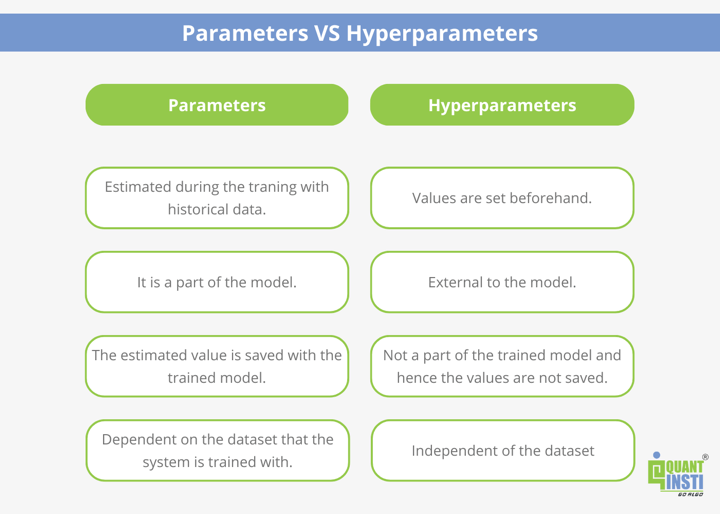

In [ ]:
IPython.display.Image("Hyperperameters.png")

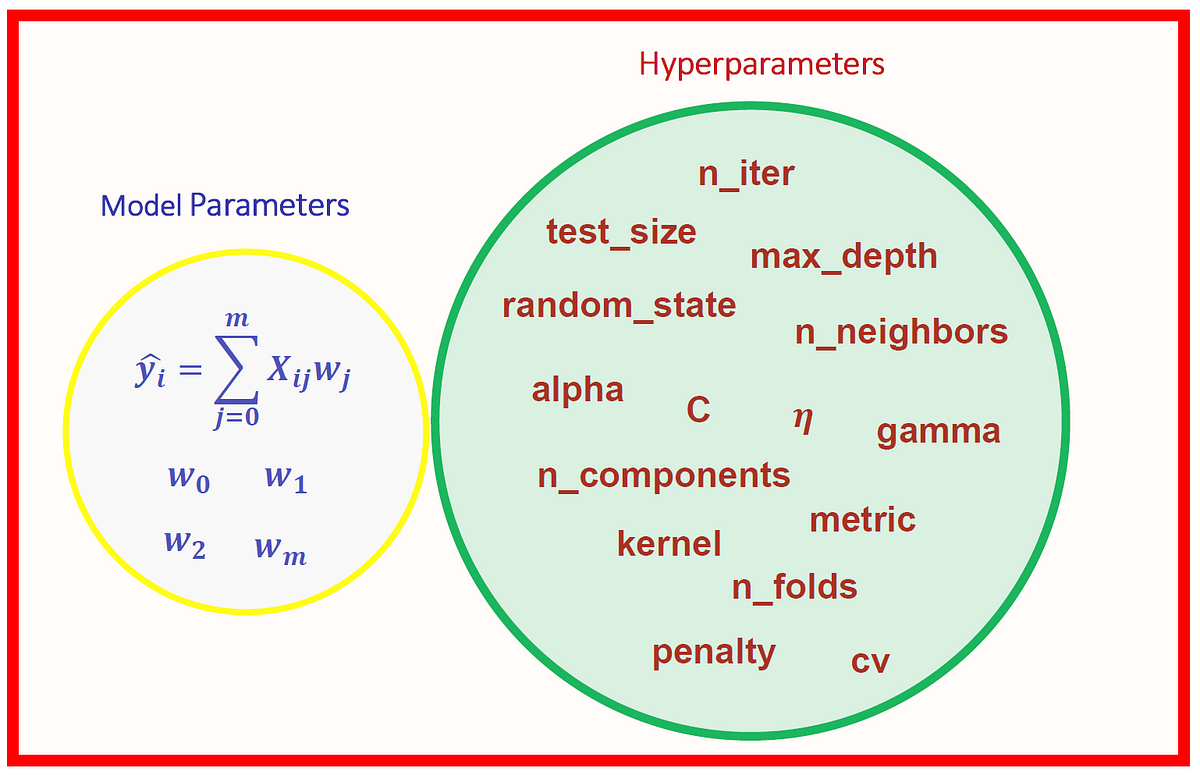

In [ ]:
IPython.display.Image("Hyperperameters_Examples.png", width = 500)

## Part 1.5: Overfitting

Overfitting occurs when a model learns the training data too well, including its noise and specific patterns that do not generalize to new data. By evaluating the model on a separate test set, you can also identify if the model is overfitting and make adjustments accordingly.

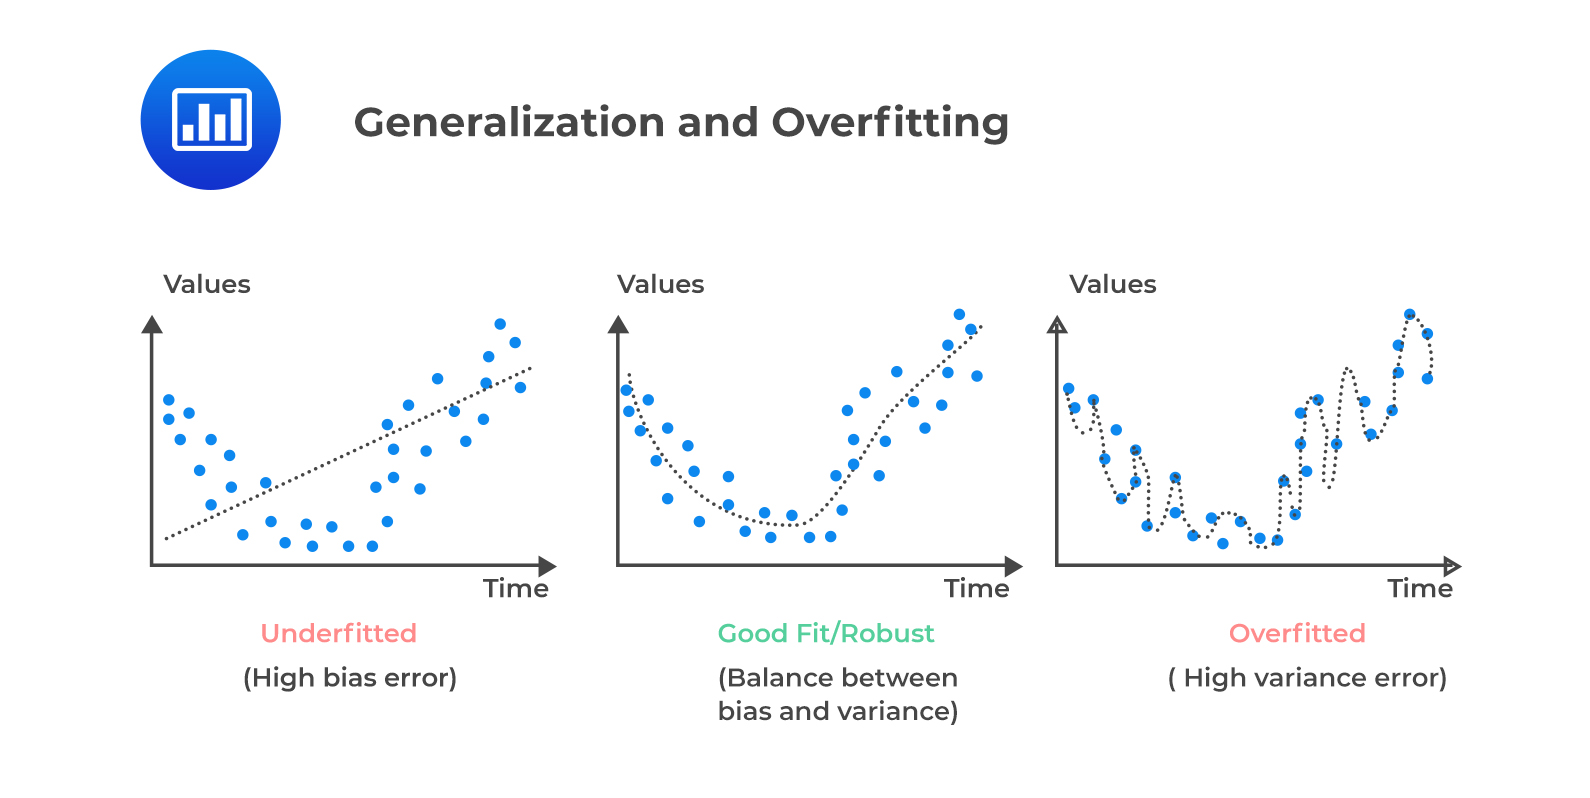

In [ ]:
IPython.display.Image("Overfitting.jpg", width=1000)

As a model trains more, when overfitting occurs, training accuracy will tend to continue to decrease while validation/testing accuracy will start to rise, since the model is not as generalizable. This can be shown by the curve below.

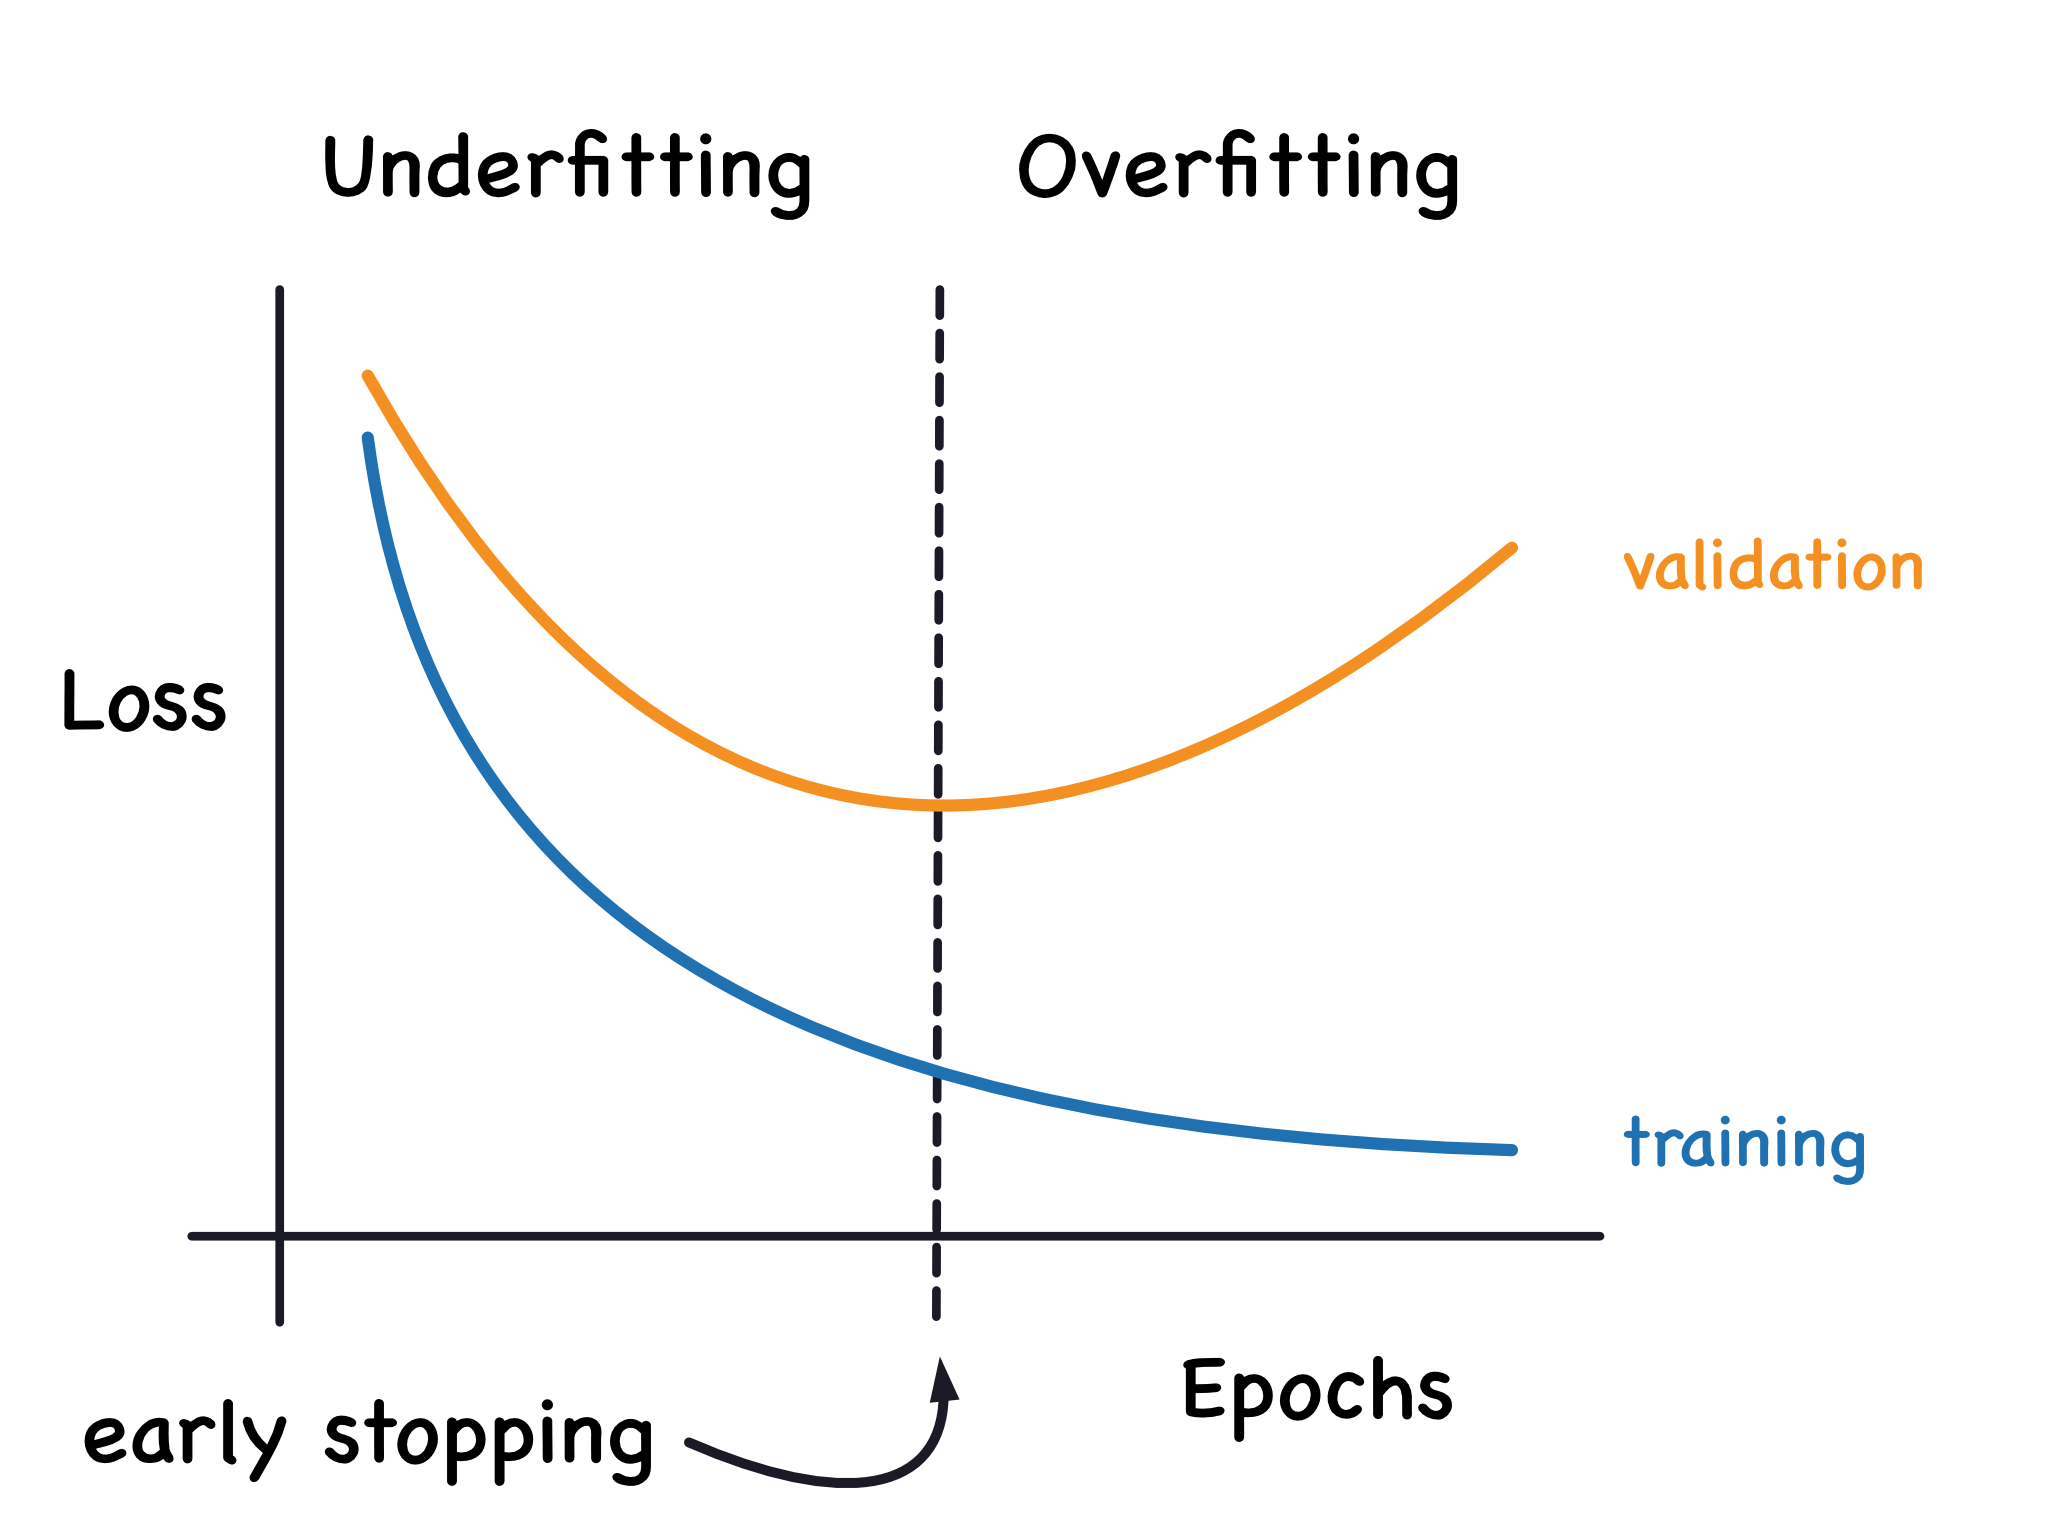

In [ ]:
IPython.display.Image("Overfitting_Curve.png", width = 600)

There are multiple ways to address overfitting, and we'll get into the details later. But here are some common methods:

- Apply regularization techniques (e.g., L1 or L2 regularization) to penalize overly complex models. This discourages the model from fitting the training data too closely.
- Use simpler models with fewer parameters. More complex models have a higher risk of overfitting to noise in the training data.
- Cross-Validation: Use techniques like k-fold cross-validation to evaluate the model's performance on different subsets of the data. This helps assess how well the model generalizes to unseen data.

# Part 2: Algorithms

## Part 2.1: Supervised Learning

Supervised learning methods can generally be grouped into Regression and Classification algorithms.

In regression, the goal is to predict a continuous output variable.  It's like fitting a curve to data points to make predictions about numerical values.

In classification, the objective is to assign input data to predefined categories or classes. It's like sorting data into buckets.

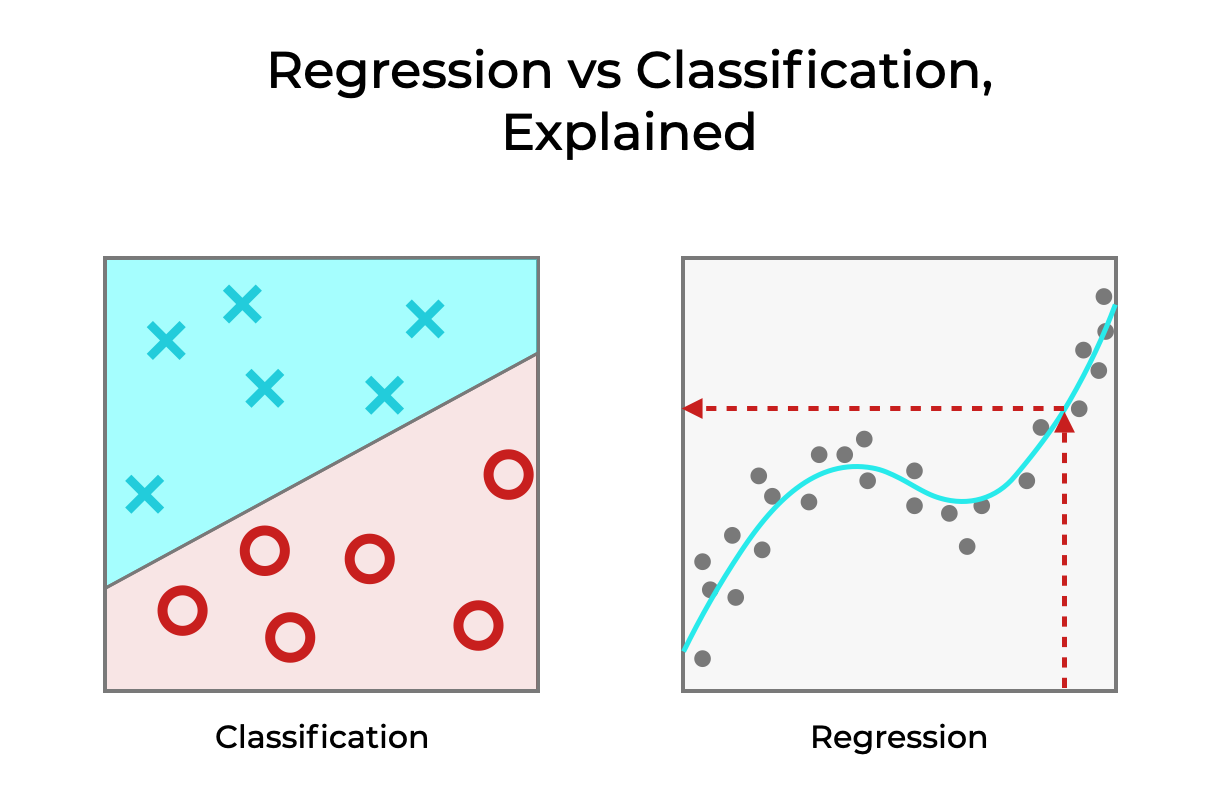

In [ ]:
IPython.display.Image("Regression_Classification.png", width=500)

### Part 2.1.1: k-Nearest Neighbors

The guiding principle behind k-Nearest Neighbors is that similar items will tend to cluster together. Think about it like high school cliques: many different students (data points) who have their own characteristics (features) form various cliques (groups). Each student belongs to a specific clique based on their interests, hobbies, or personality traits. If we have a group of jocks, and a new student that enrolls in the school seems to match much of the chracteristics & traits of jocks, they will be more inclined to be a jock. Similarly, with kNN, for a new data point that is introduced, that point will align itself with the k-nearest points that most closely resemble it.

Note that we determine the nearest neighbors by calculating the points "distances" to each other. Often times, we calculate this by computing their geometric distance.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [ ]:
wine = datasets.load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target  # Add the target column
X = wine_df.drop(columns='target')
y = wine['target']
display(wine_df)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  target  
0                            3.92   1065.0       0  
1                            3.40   1050.0       0  
2                            3.17   1185.0       0  
3                            3.45   1480.0       0  
4                            2.93    735.0       0  
..                            ...      ...     ...  
173                          1.74    740.0       2  
174                          1.56    750.0       2  
175                          1.56    835.0       2  
176                          1.62    840.0       2  
177                          1.60    560.0       2  

[178 rows x 14 columns]

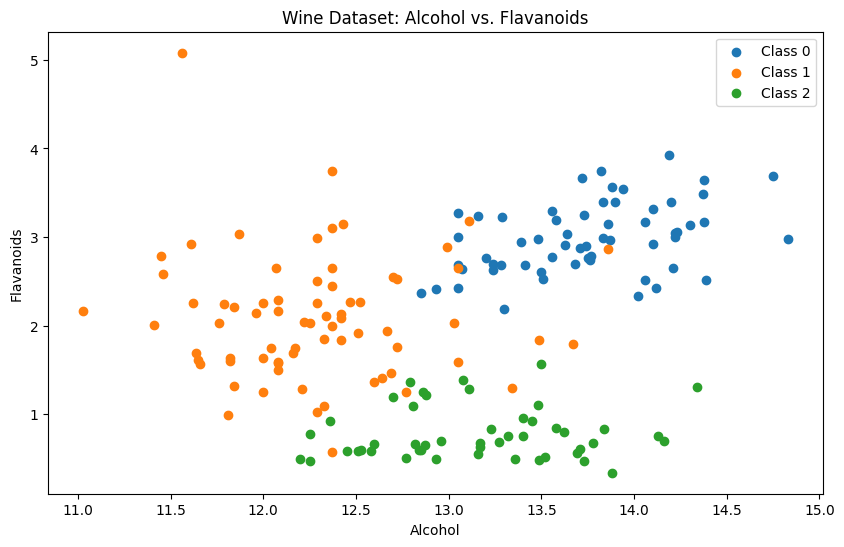

In [ ]:
plt.figure(figsize=(10, 6))
for class_label in wine_df['target'].unique():
    data_class = wine_df[wine_df['target'] == class_label]
    plt.scatter(data_class['alcohol'], data_class['flavanoids'], label=f'Class {class_label}')
plt.xlabel('Alcohol')
plt.ylabel('Flavanoids')
plt.title('Wine Dataset: Alcohol vs. Flavanoids')
plt.legend()
plt.show()

Even from just these two variables - alcohol and flavanoids - we can see a clear pattern emerge. We can very clearly see that class 0 (in blue) clusters towards the top right (more alcohol content, more flavanoids), class 1 (orange) clusters more towards middle/top left (less alcohol, more flavanoids), and class 2 (green) tends to cluster where there's less flavanoids.

And we're not limited to just comparing between two variables - we can run a KNeighborsClassifier to get all of the variables included.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 80.56%


Often times, we set the default neighbors value to 3, but here's the thing: how do we know that 3 is the most optimal value? And the answer to that is simple: we don't. We can slightly modify our code to identify the most optimal value.

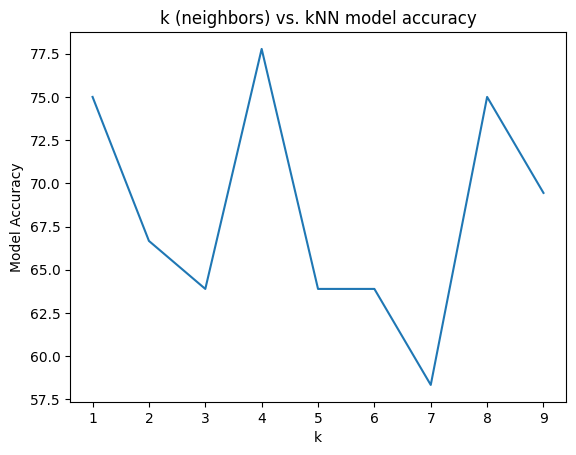

In [ ]:
values = []
for i in range(1, 10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    values.append(accuracy*100)
    #print(f"Accuracy: {accuracy * 100:.2f}%")
plt.plot(np.arange(1, 10, 1), values)
plt.title('k (neighbors) vs. kNN model accuracy')
plt.xlabel('k')
plt.ylabel('Model Accuracy')
plt.show()

### Part 2.1.2: Decision Trees

Decision Trees, like kNN, is very simple. A tree is comprised of nodes and edges, where each node contains the data points that satisfy the condition, and edges act as "deciders" to group datapoints together (hence, the name "decision tree"). Terminal nodes, also called leaves, is the final predicted outcome for the group. Every data point will flow down the decision tree until they hit a leaf, from which it is classified (or given a value). Ideally, we would like to have a decision tree that can balance having as few decisions as possible (limiting the depth of the tree) while also making sure as many leaves are as pure as possible (pure, in this case, meaning that all of

You can split however you would like. That being said, the best splits are those that can maximize the information gain (another way to think about it is: "if I were to split based on this data, would it be easier to classify/assign the data?"). For the sake of this discussion, you don't need to understand the nitty-gritty behind the most optimal split (since the sklearn libraries have been developed for you), but it will be a topic that will come up if you take courses in ML, so if you're interested, I *strongly* recommend the StatQuest video on decision trees, where Josh goes a lot more in depth (StatQuest the homie).

We can run decision trees as either a classifier or regressor. Let's run an example with classifiers first.

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, RocCurveDisplay

breast_cancer = datasets.load_breast_cancer()
breast_cancer_df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
breast_cancer_df['target'] = breast_cancer.target
X = breast_cancer_df.drop(columns=['target'])
y = breast_cancer_df['target']
display(breast_cancer_df)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
0                  0.2654          0.4601                  0.11890       0  
1                  0.1860          0.2750                  0.08902       0  
2                  0.2430          0.3613                  0.08758       0  
3                  0.2575          0.6638                  0.17300       0  
4                  0.1625          0.2364                  0.076

Accuracy: 93.09%


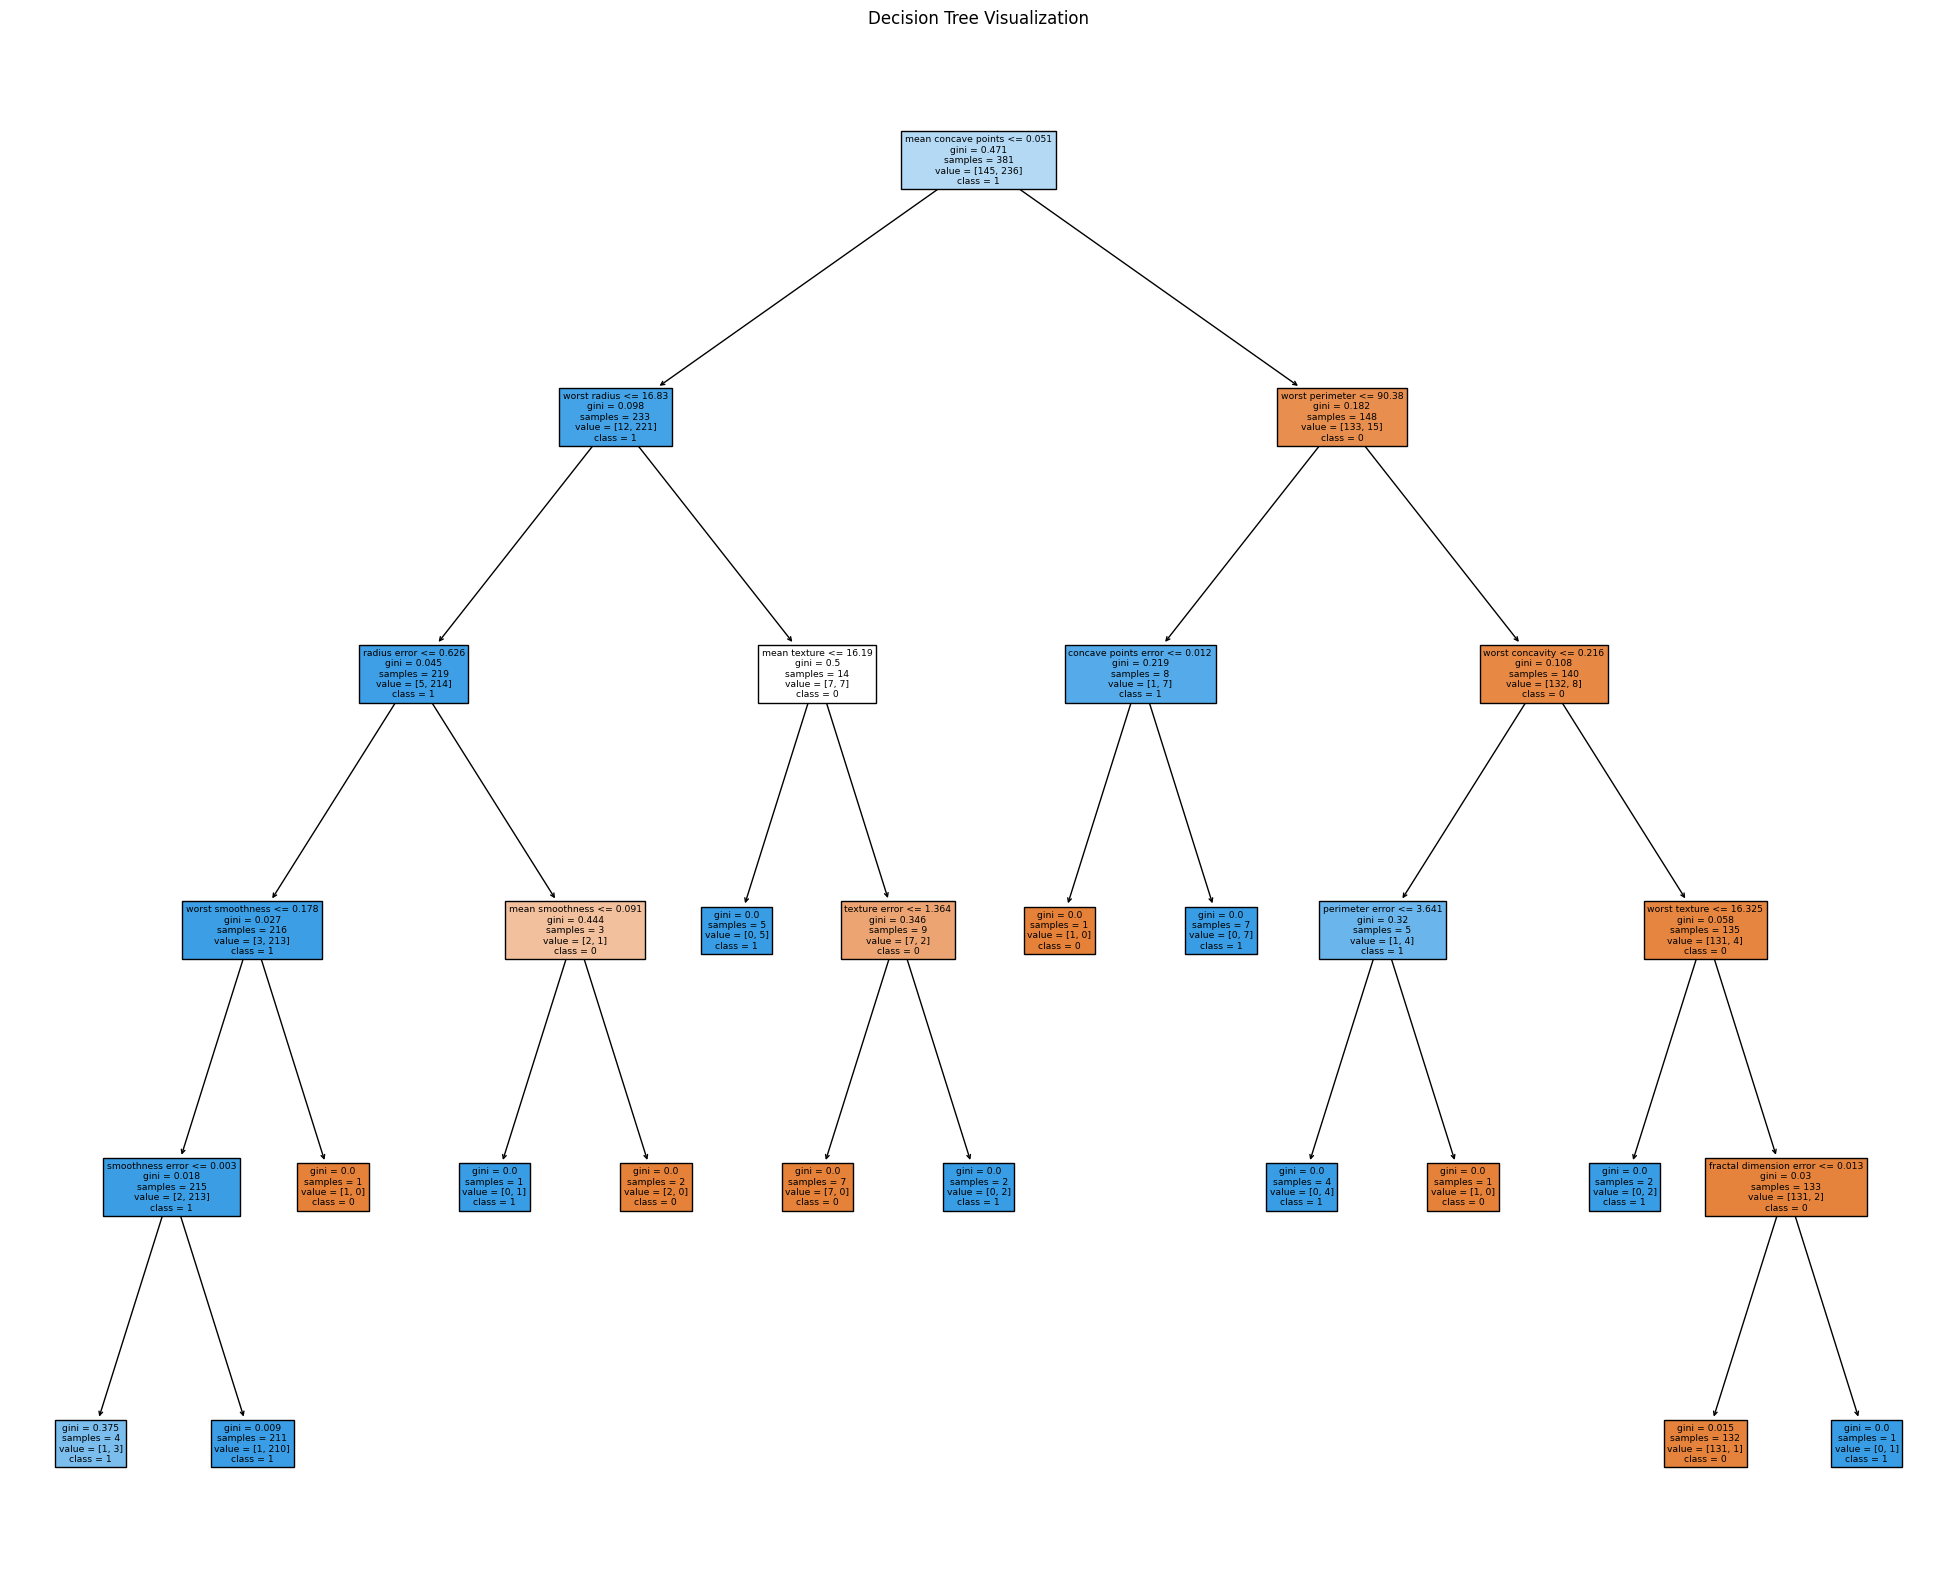

In [ ]:
# Train & test the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
decision_tree_classifier = DecisionTreeClassifier(max_depth=5)
decision_tree_classifier.fit(X_train, y_train)
y_pred = decision_tree_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot decision tree
plt.figure(figsize=(25, 20))
plot_tree(decision_tree_classifier, filled=True, feature_names=breast_cancer_df.columns[:-1], class_names=[str(c) for c in breast_cancer_df['target'].unique()])
plt.title("Decision Tree Visualization")
plt.show()

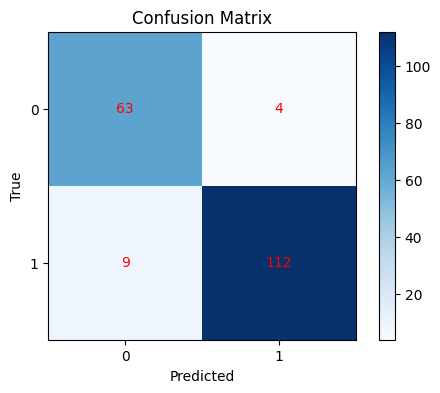

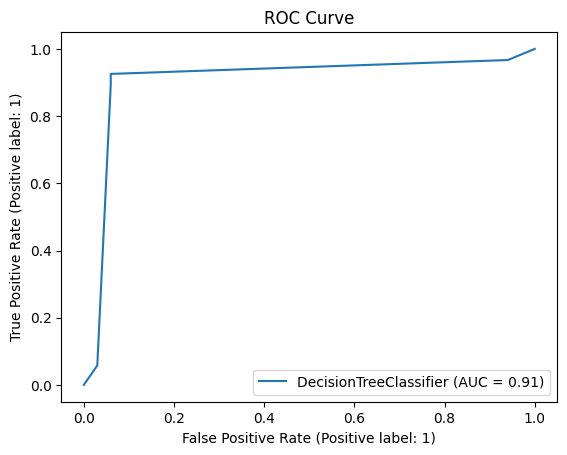

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(breast_cancer_df['target'].unique()))
plt.xticks(tick_marks, [str(c) for c in breast_cancer_df['target'].unique()])
plt.yticks(tick_marks, [str(c) for c in breast_cancer_df['target'].unique()])
plt.xlabel('Predicted')
plt.ylabel('True')

for i in range(len(breast_cancer_df['target'].unique())):
    for j in range(len(breast_cancer_df['target'].unique())):
        plt.text(j, i, f"{conf_matrix[i, j]}", ha='center', va='center', color='red')

plt.show()

# Plot ROC curve
RocCurveDisplay.from_estimator(decision_tree_classifier, X_test, y_test)
plt.title('ROC Curve')
plt.show()

Now here's an example of a decision tree regressor. Let's use a housing dataset.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

california = datasets.fetch_california_housing()
california_df = pd.DataFrame(data=california.data, columns=california.feature_names)
california_df['target'] = california.target
X = california_df.drop(columns=['target'])
y = california_df['target']
display(california_df)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  target  
0        -122.23   4.526  
1        -122.22   3.585  
2        -122.24   3.521  
3        -122.25   3.413  
4        -122.25   3.422  
...          ...     ...  
20635    -121.09   0.781  
20636    -121.21   0.771  
20637    -121.22   0.923  
20638    -121.32   0.847  
20639    -121.24   0.894  

[20640 rows x 9 columns]

Mean Squared Error: 0.52
R-squared (R2) Score: 0.60


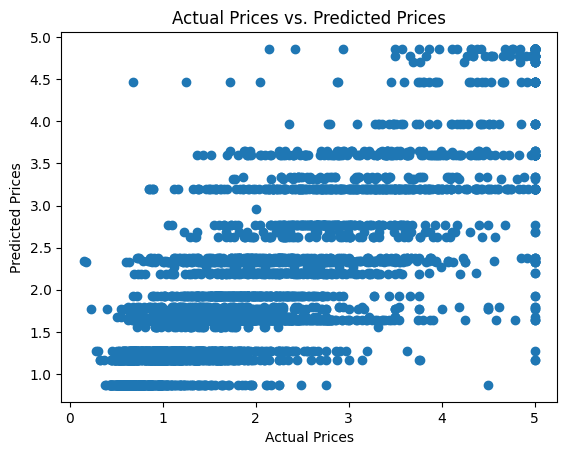

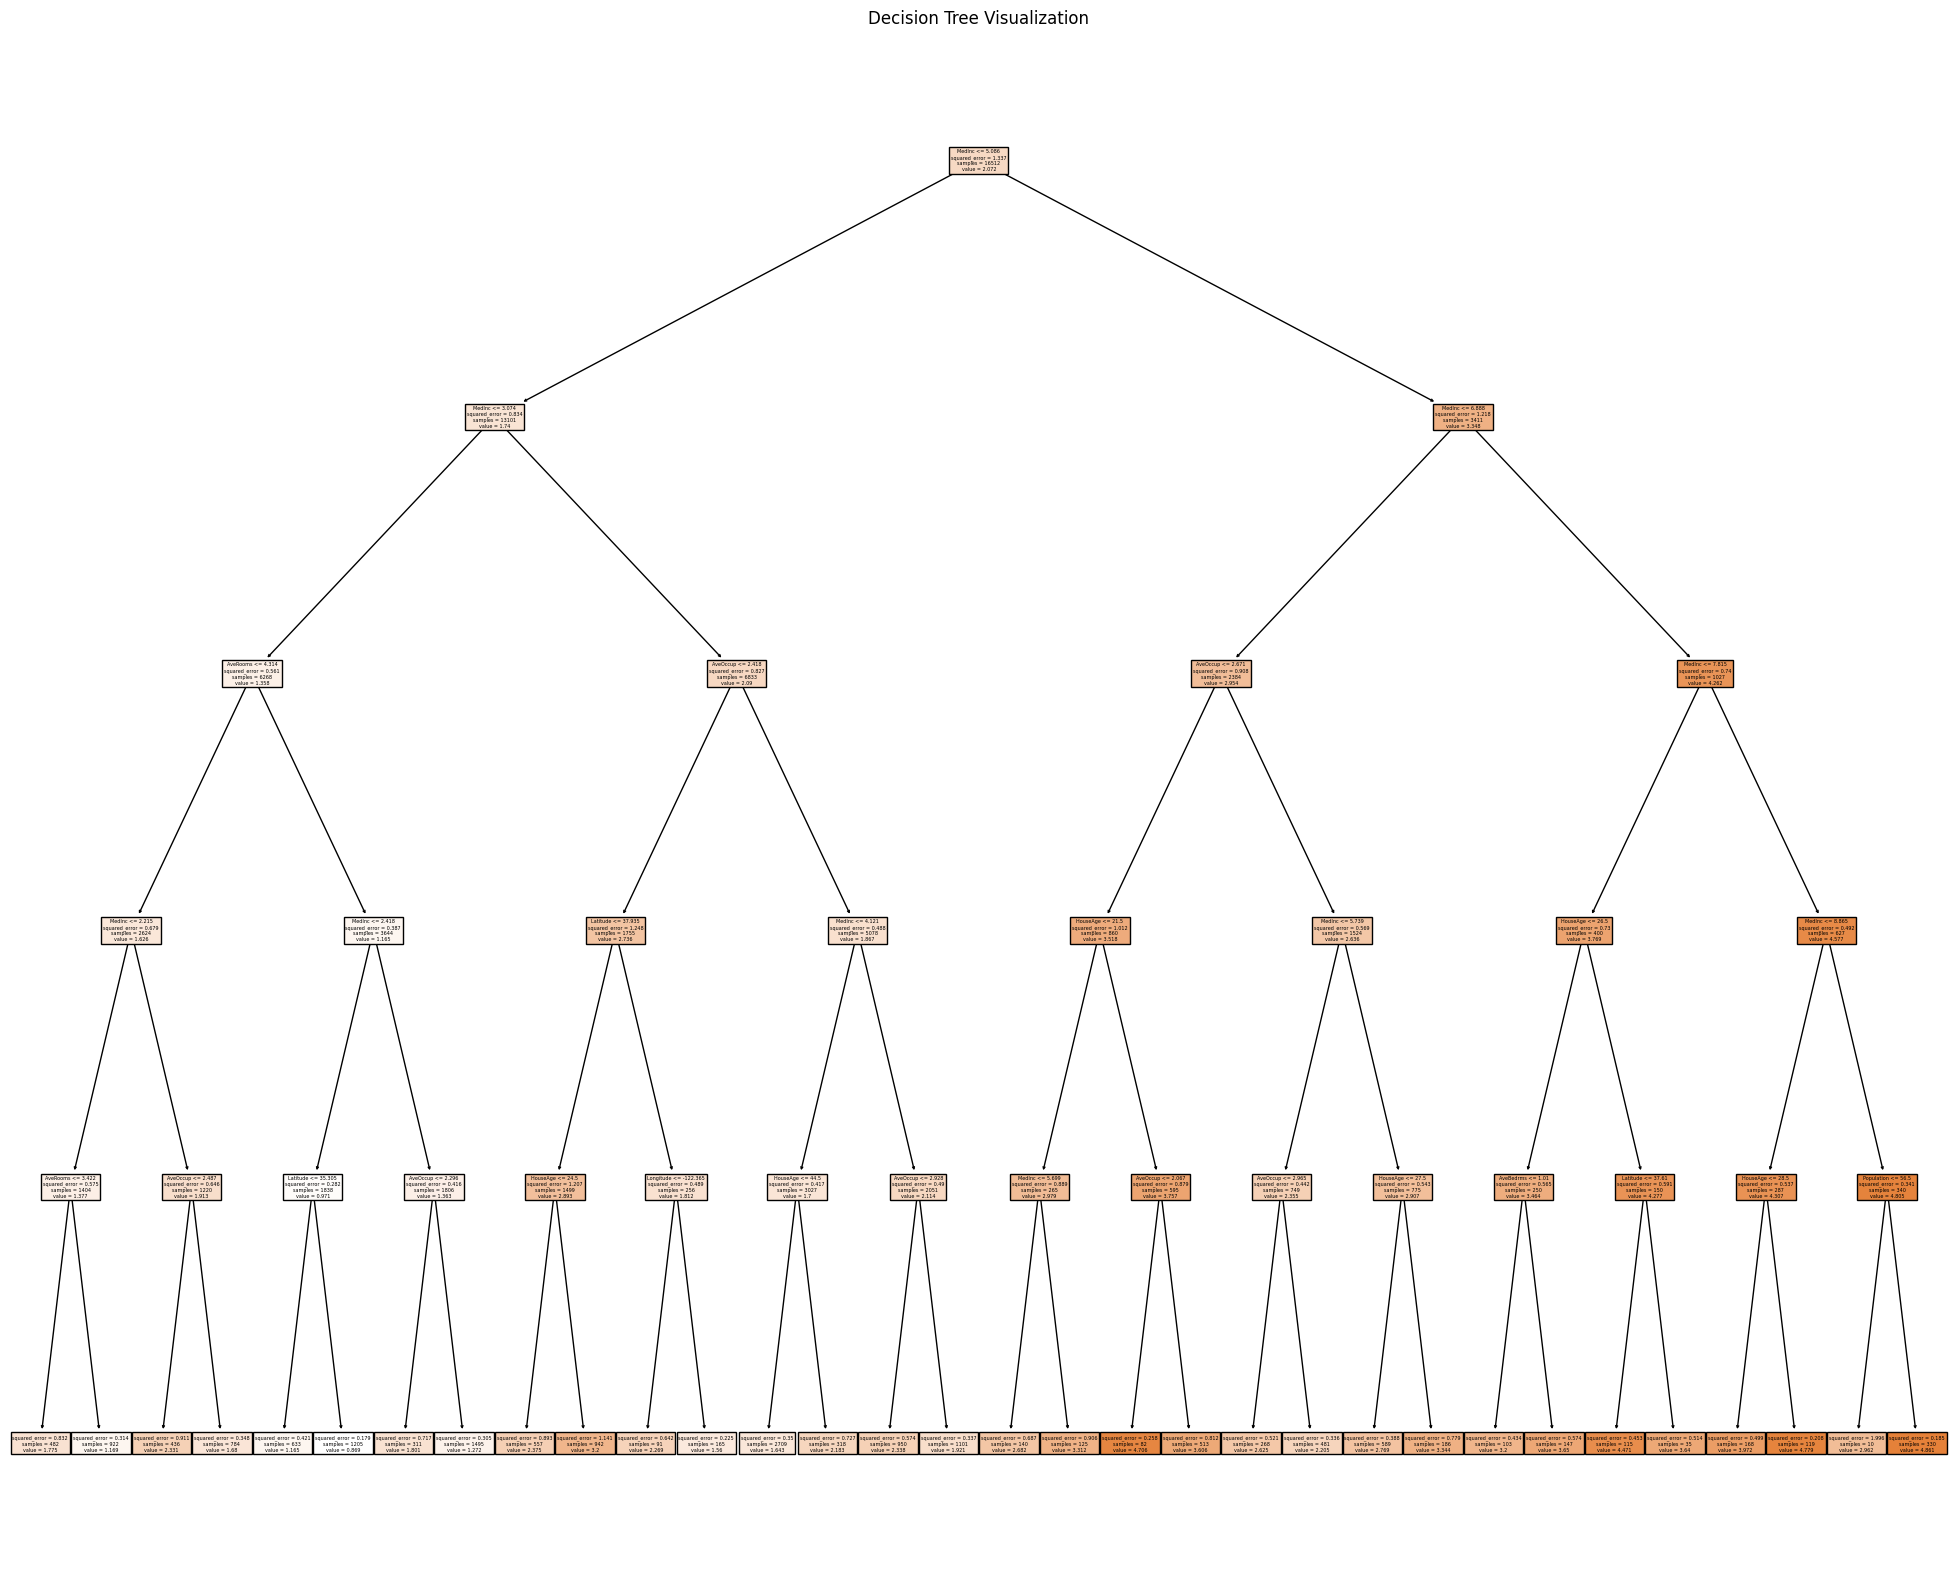

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
decision_tree_regressor = DecisionTreeRegressor(random_state=42, max_depth=5)
decision_tree_regressor.fit(X_train, y_train)
y_pred = decision_tree_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

plt.figure(figsize=(25, 20))
plot_tree(decision_tree_regressor, filled=True, feature_names=california_df.columns[:-1], class_names=[str(c) for c in california_df['target'].unique()])
plt.title("Decision Tree Visualization")
plt.show()

### Part 2.1.3: Random Forest

Mean Squared Error: 0.26
R-squared (R2) Score: 0.81


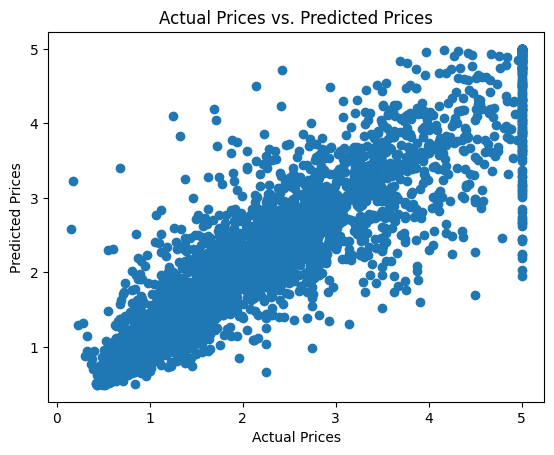

In [ ]:
from sklearn.ensemble import RandomForestRegressor

california = datasets.fetch_california_housing()
california_df = pd.DataFrame(data=california.data, columns=california.feature_names)
california_df['target'] = california.target
X = california_df.drop(columns=['target'])
y = california_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_regressor.fit(X_train, y_train)
y_pred = random_forest_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

### Part 2.1.4: Linear Regression


Linear regression is a regression algorithm used for predicting a continuous outcome based on one or more input features.

The algorithm finds the best-fitting line (or hyperplane in higher dimensions) that minimizes the difference between the predicted and actual values.

Linear regression is widely used for tasks like predicting stock prices, sales forecasting, and other scenarios where understanding and modeling linear relationships are essential.

Essentially, the formula for linear regression consists of multiplying independent variables with coefficients, and then adding them all together.

The goal during training is to find the optimal values for each coefficient such that they minimize the difference between the predicted values and the actual values in the dataset.

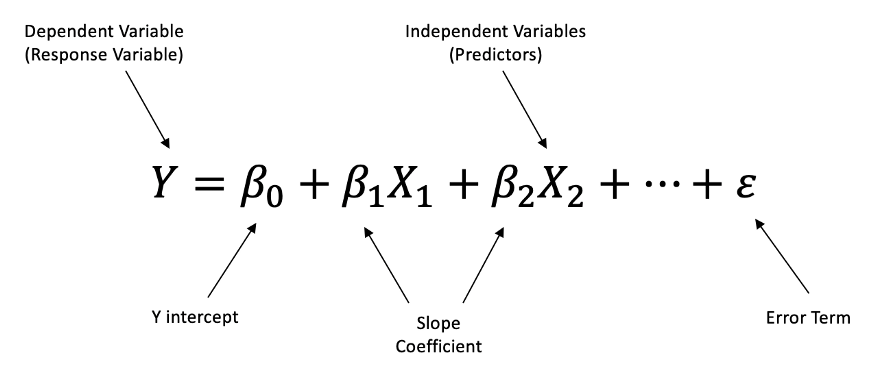

In [ ]:
IPython.display.Image("Linear_Regression1.png")

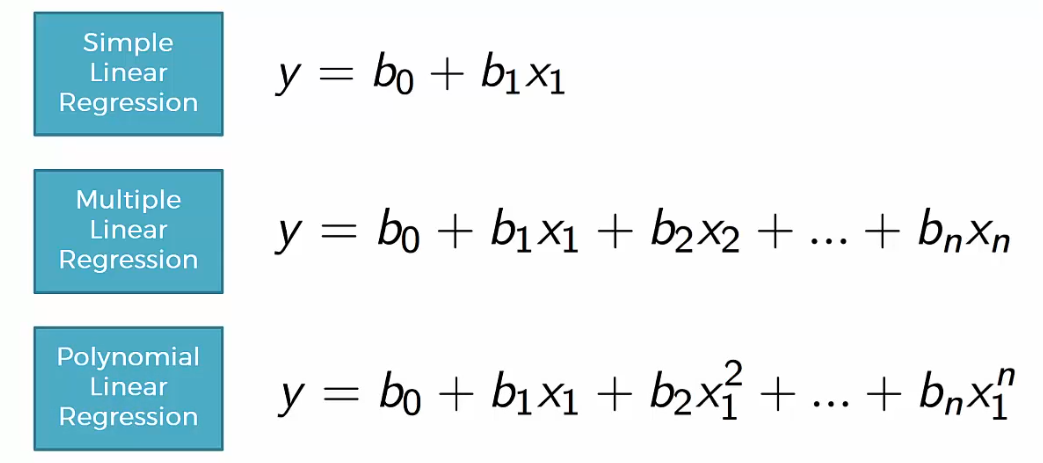

In [ ]:
IPython.display.Image("Linear_Regression2.png")

An example of linear regression would be predicting housing prices from various features. We can use the Housing Prices dataset for this. We can import the dataset below. The objective of this dataset is to predict housing prices, and since its a continuous variable, a regression model would work best here.

In [ ]:
housing_prices = pd.read_csv("housing_prices.csv")
housing_prices.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

We can quickly do the data preprocessing. As previously discussed, it's important to do data preprocessing before model training to improve accuracy and avoid training models on garbage data. When we run ```info()``` on the dataset, we can see the null values and which columns they are in.

In [ ]:
housing_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Let's first do an example of linear regression where we use one input feature to predict housing prices. This is really intuitive since it's just like the ```y= mx + b``` stuff you learned from middle school. Let's evaluate Sale Price from first floor square feet. We can plot ```1stFlrSF``` on the x-axis and ```SalePrice``` on the y-axis beforehand. Since there are no null values of ```1stFlrSF```, we can just use the data as is.

<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

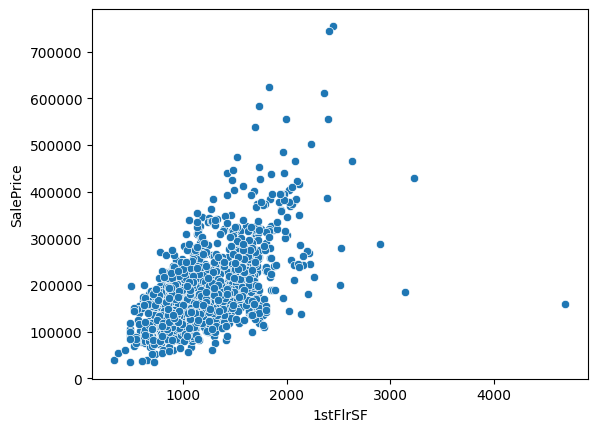

In [ ]:
import seaborn as sns
sns.scatterplot(x='1stFlrSF', y='SalePrice', data=housing_prices)

From the plot, there seems to be a correlation between first floor square footage and sale price.

Now, let's create and train the linear regression model. The model finds the optimal parameter values (slope, y-intercept) through the Ordinary Least Squares method. It minimizes the sum of squared differences between actual and predicted values.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

X = housing_prices[["1stFlrSF"]]
y = housing_prices["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Creating a Linear Regression model
model = LinearRegression()

# Fitting the model to the data- optimizing parameters
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating Model
r_squared = model.score(X_test, y_test)
print('R-squared:', r_squared)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# We can use rmse (root mean squared error) to make the number less big. All it does is square root the MSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

R-squared: 0.4162952495593317
Mean Squared Error: 4073146477.280662
Root Mean Squared Error: 63821.20711237498


To evaluate accuracy of linear regression models, we can use R^2 and Mean Squared Error (MSE).

R^2, or coefficient of determination measures the amount of variation in the predictor explained by the model. sklearn provides a function to calculate this value for a model.

MSE measures the average squared difference between predicted and actual values.

The goal is to minimize MSE and maximize for the testing dataset, which means we have an accurate model that effectively predicts the output variable. We can also compare the metrics from training to testing to see whether the model generalizes well.




The following chart visualizes our model and line of best fit that was found by optimizing the slope and y-intercept. Basically, the red line was found through linear regression & machine learning.

Coefficients: 116.18826157773618
Intercept: 45402.8948680436


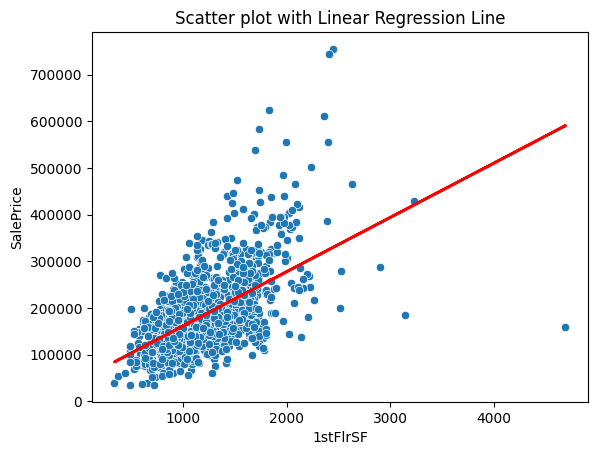

In [ ]:
# Get the coefficients (slope)
coefficients = model.coef_[0]
print('Coefficients:', coefficients)

# Get the intercept
intercept = model.intercept_
print('Intercept:', intercept)

# Plot the line
sns.scatterplot(x='1stFlrSF', y='SalePrice', data=housing_prices)

# Overlay the regression line
plt.plot(housing_prices['1stFlrSF'], model.predict(housing_prices[['1stFlrSF']]), color='red', linewidth=2)

# Show the plot
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')
plt.title('Scatter plot with Linear Regression Line')
plt.show()

We can also do this for multiple variables, which will often give us better results since more information is considered in making predictions of the ```SalePrice```. Of course, it's much more difficult to visualize linear regression with multiple variables.

Just for simplicity, we'll use some of the more important features, rather than going through all 80 and fixing the data of each, which would take a while.

In [ ]:
condensed_housing_prices = housing_prices[['LotArea', 'YearBuilt', 'Exterior1st', 'Exterior2nd', 'FullBath', 'BedroomAbvGr','1stFlrSF', '2ndFlrSF','SalePrice']]
condensed_housing_prices

LotArea  YearBuilt Exterior1st Exterior2nd  FullBath  BedroomAbvGr  \
0        8450       2003     VinylSd     VinylSd         2             3   
1        9600       1976     MetalSd     MetalSd         2             3   
2       11250       2001     VinylSd     VinylSd         2             3   
3        9550       1915     Wd Sdng     Wd Shng         1             3   
4       14260       2000     VinylSd     VinylSd         2             4   
...       ...        ...         ...         ...       ...           ...   
1455     7917       1999     VinylSd     VinylSd         2             3   
1456    13175       1978     Plywood     Plywood         2             3   
1457     9042       1941     CemntBd     CmentBd         2             4   
1458     9717       1950     MetalSd     MetalSd         1             2   
1459     9937       1965     HdBoard     HdBoard         1             3   

      1stFlrSF  2ndFlrSF  SalePrice  
0          856       854     208500  
1         1262         0     181500  
2          920       866     223500  
3          961       756     140000  
4         1145      1053     250000  
...        ...       ...        ...  
1455       953       694     175000  
1456      2073         0     210000  
1457      1188      1152     266500  
1458      1078         0     142125  
1459      1256         0     147500  

[1460 rows x 9 columns]

Before feeding the data into the model, let's check for null values.

In [ ]:
condensed_housing_prices.isna().sum()

LotArea         0
YearBuilt       0
Exterior1st     0
Exterior2nd     0
FullBath        0
BedroomAbvGr    0
1stFlrSF        0
2ndFlrSF        0
SalePrice       0
dtype: int64

It looks like there are no null values in the columns that we selected. However, other columns like ```Fence``` do appear to have nulls, and you would have to deal with those if you were to use that column.

We should also encode categorical variables so that they are numeric. As shown in the linear regression formula, the machine learning model won't be able to plug in categorical variables and add them together to get a numerical output. It won't make sense to the model.

In [ ]:
print(condensed_housing_prices["Exterior1st"].value_counts())
print(condensed_housing_prices["Exterior2nd"].value_counts())
print(condensed_housing_prices["YearBuilt"].value_counts())

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64
2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: YearBuilt, Length: 112, dtype: int64


With the Exterior materials, each column has 15 values, which isn't too much for one-hot encoding. Remember that one-hot encoding takes categorical variables and converts each value into its own column, with 1 if the data point is of that value and 0 if it is different.

With the year, we can ordinally encode that, as there will likely be meaning to housing prices as time progresses.

In [ ]:
# Get list of years in sorted order so we can specify the encoding order
unique_years = sorted(condensed_housing_prices['YearBuilt'].unique())
unique_years

[1872,
 1875,
 1880,
 1882,
 1885,
 1890,
 1892,
 1893,
 1898,
 1900,
 1904,
 1905,
 1906,
 1908,
 1910,
 1911,
 1912,
 1913,
 1914,
 1915,
 1916,
 1917,
 1918,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Use Ordinal Encoding on Year Built
ordinal_encoder = OrdinalEncoder(categories=[unique_years])

# Transform the data and add to new column
condensed_housing_prices['EncodedYear'] = ordinal_encoder.fit_transform(condensed_housing_prices[['YearBuilt']])

# Drop the old column
condensed_housing_prices.drop('YearBuilt', axis=1, inplace=True)


# Use One-Hot Encoding on Exterior1st and Exterior2nd
one_hot_encoder = OneHotEncoder()


exterior1_encoded = pd.get_dummies(condensed_housing_prices['Exterior1st'], dummy_na=False, prefix="Exterior1st")

# Concatenate the dataframe into another df
condensed_housing_prices = pd.concat([condensed_housing_prices, exterior1_encoded], axis=1)

# Drop the old column
condensed_housing_prices.drop('Exterior1st', axis=1, inplace=True)

exterior2_encoded = pd.get_dummies(condensed_housing_prices['Exterior2nd'], dummy_na=False, prefix="Exterior2nd")

# Concatenate the dataframe into another df
condensed_housing_prices = pd.concat([condensed_housing_prices, exterior2_encoded], axis=1)

# Drop the old column
condensed_housing_prices.drop('Exterior2nd', axis=1, inplace=True)


condensed_housing_prices

<ipython-input-42-7814f9780672>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condensed_housing_prices['EncodedYear'] = ordinal_encoder.fit_transform(condensed_housing_prices[['YearBuilt']])
<ipython-input-42-7814f9780672>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condensed_housing_prices.drop('YearBuilt', axis=1, inplace=True)


LotArea  FullBath  BedroomAbvGr  1stFlrSF  2ndFlrSF  SalePrice  \
0        8450         2             3       856       854     208500   
1        9600         2             3      1262         0     181500   
2       11250         2             3       920       866     223500   
3        9550         1             3       961       756     140000   
4       14260         2             4      1145      1053     250000   
...       ...       ...           ...       ...       ...        ...   
1455     7917         2             3       953       694     175000   
1456    13175         2             3      2073         0     210000   
1457     9042         2             4      1188      1152     266500   
1458     9717         1             2      1078         0     142125   
1459     9937         1             3      1256         0     147500   

      EncodedYear  Exterior1st_AsbShng  Exterior1st_AsphShn  \
0           104.0                    0                    0   
1            77.0                    0                    0   
2           102.0                    0                    0   
3            19.0                    0                    0   
4           101.0                    0                    0   
...           ...                  ...                  ...   
1455        100.0                    0                    0   
1456         79.0                    0                    0   
1457         44.0                    0                    0   
1458         51.0                    0                    0   
1459         66.0                    0                    0   

      Exterior1st_BrkComm  ...  Exterior2nd_HdBoard  Exterior2nd_ImStucc  \
0                       0  ...                    0                    0   
1                       0  ...                    0                    0   
2                       0  ...                    0                    0   
3                       0  ...                    0                    0   
4                       0  ...                    0                    0   
...                   ...  ...                  ...                  ...   
1455                    0  ...                    0                    0   
1456                    0  ...                    0                    0   
1457                    0  ...                    0                    0   
1458                    0  ...                    0                    0   
1459                    0  ...                    1                    0   

      Exterior2nd_MetalSd  Exterior2nd_Other  Exterior2nd_Plywood  \
0                       0                  0                    0   
1                       1                  0                    0   
2                       0                  0                    0   
3                       0                  0                    0   
4                       0                  0                    0   
...                   ...                ...                  ...   
1455                    0                  0                    0   
1456                    0                  0                    1   
1457                    0                  0                    0   
1458                    1                  0                    0   
1459                    0                  0                    0   

      Exterior2nd_Stone  Exterior2nd_Stucco  Exterior2nd_VinylSd  \
0                     0                   0                    1   
1                     0                   0                    0   
2                     0                   0                    1   
3                     0                   0                    0   
4                     0                   0                    1   
...                 ...                 ...                  ...   
1455                  0                   0                    1   
1456                  0                   0                    0   
1457                  0       

There's more things that could be done in the preprocessing stuff with regard to feature selection, feature engineering, normalization, etc. Doing that stuff could potentially make the model results even better. For simplicity, though, we'll just move on.

Now we can feed the inputs into a Regression model evaluate for accuracy again.

In [ ]:
X = condensed_housing_prices.drop("SalePrice", axis=1)
y = condensed_housing_prices["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Creating a Linear Regression model
model = LinearRegression()

# Fitting the model to the data- optimizing parameters
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating Model
r_squared = model.score(X_test, y_test)
print('R-squared:', r_squared)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# We can use rmse (root mean squared error) to make the number less big. All it does is square root the MSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

R-squared: 0.7478232392170241
Mean Squared Error: 1759713081.0735683
Root Mean Squared Error: 41948.934206646634


As shown from the higher R^2 value and lower MSE, adding more features in this case helped make our model more accurate. Obviously, this won't always be the case if garbage is added to the models.

### Part 2.1.5: Logistic Regression




Logistic Regression is a classification algorithm used for predicting classes/categories of the outcome variable.

Instead of a linear equation, logistic regression uses the sigmoid (logistic) function to transform a linear combination of input features into a probability score between 0 and 1.

The output of logistic regression is interpreted as the probability of belonging to a particular class. Values close to 0 indicate a low probability, while values close to 1 indicate a high probability.

Logistic regression predicts class labels by applying a decision boundary based on a specified threshold. If the predicted probability is above the threshold, the instance is classified as one class; otherwise, it's classified as the other.

While it's possible to do logistic regression methods on more than two variables (such as one-vs-all), it's widely used for binary classification problems (true/false, 0/1, etc.).

Applications for logistic regression include fraud detection, disease prediction, customer churn, and many other problems requiring binary classification.

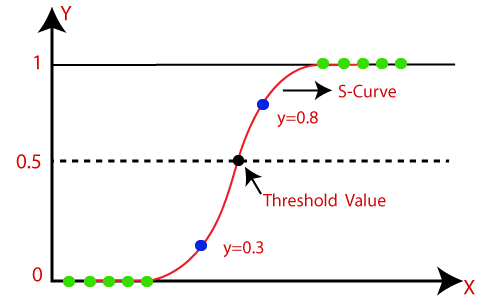

In [ ]:
IPython.display.Image("Logistic_Regression.png")

Don't worry about the math, but the logistic regression formula basically makes each output have a value between 0 and 1, which are probabilities of being in the positive class.

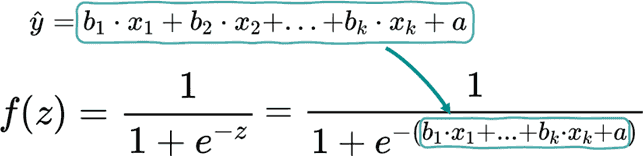

In [ ]:
IPython.display.Image("Logistic_Regression_Formula.png")

A Linear vs. Logistic Regression comparison can be found below.

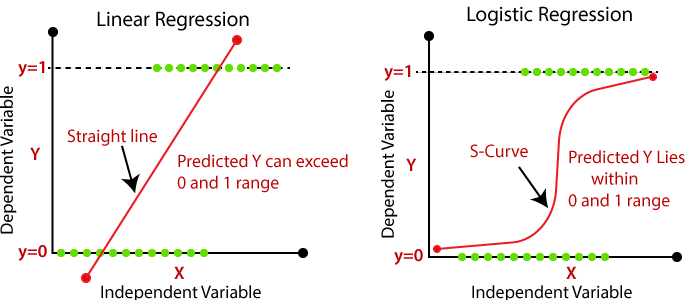

In [ ]:
IPython.display.Image("Linear_vs_Logistic.png")

Since the output (what to predict) of the Housing Prices dataset (price) is continuous, using logistic regression wouldn't be the best approach. Instead, we can use the iris dataset, which has a categorical variable for its output. We can use the code/imports we have already established in the Analysis part.

In [ ]:
from sklearn.linear_model import LogisticRegression
iris = sns.load_dataset('iris')

X = iris.drop("species", axis=1)
y = iris["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a logistic regression model
model = LogisticRegression(max_iter = 50000)

# Train the model on the training data
model.fit(X_train, y_train)

# Make the predictions
y_pred = model.predict(X_test)

# Evaluate the model and get the accuracies/other stats
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=iris["species"].unique())

print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Accuracy refers to the proportion of correctly classified instances out of the total instances. (Correct predictions / total predictions)

The classification report is a useful tool for evaluating the performance of a classification model. It provides a comprehensive summary of various metrics, including precision, recall, f1-score, and support, for each class in a classification problem.

Precision is the ratio of true positive predictions to the total predicted positives.

Recall is the ratio of true positive predictions to the total actual positives.

F1-score is the harmonic mean of precision and recall.

Support is the number of actual occurrences of the class in the specified dataset.

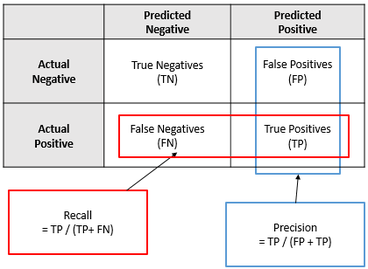

In [ ]:
IPython.display.Image("PrecisionRecall.PNG")

### Part 2.1.6: Support Vector Machines

If we have data that is linearly separable, then that means we have data that we can draw a line to completely (or almost completely) separate our data. However, we have a problem. If we can use lines to separate on a hyperplane, how do we know which "line" is the best to use?
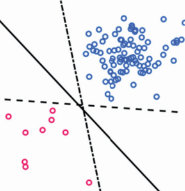

That's where support vector machines, or SVMs, come into play. The guiding principle behind SVMs are the we can find the most "optimal" line by finding the line with the greatest "margins" between points.

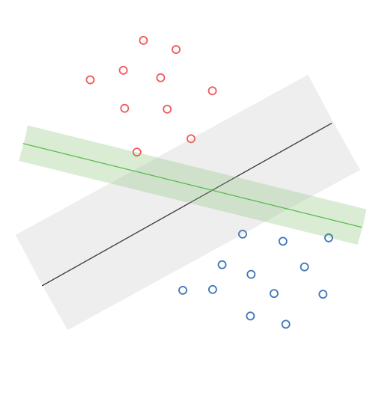

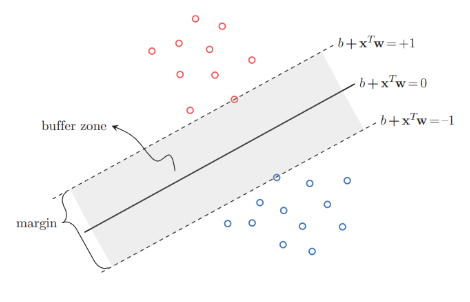

One interesting problem to solve with SVMs are margins and how we want our margin to act. We have hard-margin SVMs, which aim to maximize the margin among perfectly linearly separable data, and soft-margin SVMs, which allow for some tolerance by having "margin errors" in the data. We can determine what kind of SVM we want through SVM's most important hyperparameter: *C*. We can calculate the overall error of SVM models by adding the margin errors (data points which fall inside the margin, but are still otherwise classified correctly) and the classification errors (data point is mis-classified).

![image](https://miro.medium.com/v2/resize:fit:552/1*CD08yESKvYgyM7pJhCnQeQ.png)

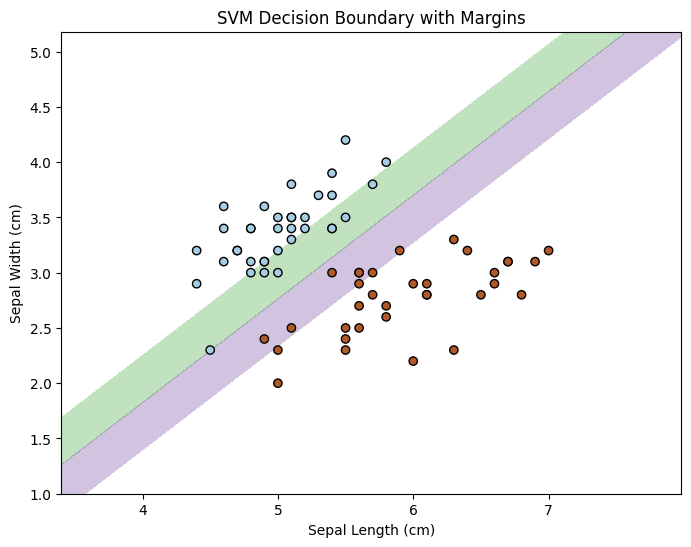

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

iris = datasets.load_iris()
X = iris.data[:100, :2]
y = iris.target[:100]

data = pd.DataFrame(data=np.c_[X, y], columns=["Sepal Length (cm)", "Sepal Width (cm)", "Class"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_train, y_train)

def plot_decision_boundary_with_margins(X, y, classifier, ax):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.3, cmap=plt.cm.Paired)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)

plt.figure(figsize=(8, 6))
plot_decision_boundary_with_margins(X_train, y_train, svm_classifier, plt)
plt.title('SVM Decision Boundary with Margins')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

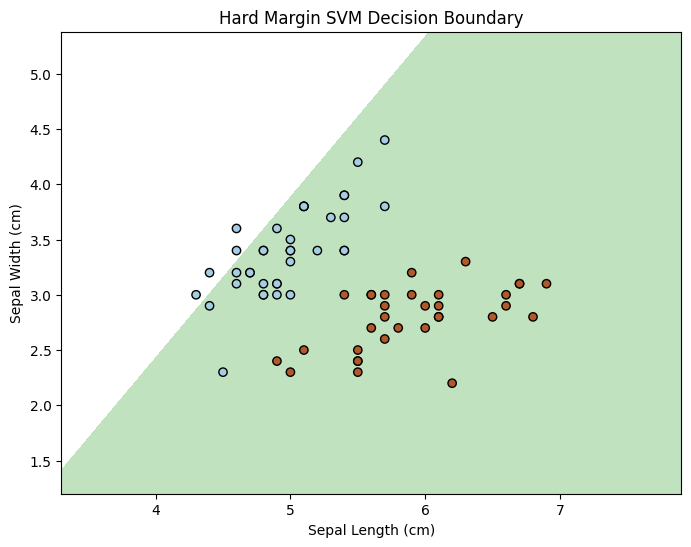

In [ ]:
data = pd.DataFrame(data=np.c_[X, y], columns=["Sepal Length (cm)", "Sepal Width (cm)", "Class"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svm_classifier = SVC(kernel='linear', C=0.001)
svm_classifier.fit(X_train, y_train)

plt.figure(figsize=(8, 6))
plot_decision_boundary_with_margins(X_train, y_train, svm_classifier, plt)
plt.title('Hard Margin SVM Decision Boundary')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()


So why bother with soft-margin or hard-margin SVMs? Well,

* We increase our *C* value to decrease our classification error (higher *C* values indicate soft-margin SVMs).
* However, if we want to maximize our margin, we want to decrease our *C* value (*C* values close to 0 indicate hard-margin SVMs).
* Ideally, we find the most optimal value of *C* through methods like cross-validation.

## Part 2.2: Unsupervised Learning

Unsupervised learning is a type of machine learning where the algorithm learns from unlabeled data without explicit instructions, aiming to discover hidden patterns, relationships, or structures within the information provided.

There are a multiple categories of unsupervised learning.

### Part 2.2.1: Clustering

Clustering involves grouping similar data points together based on certain features or characteristics. It's like sorting data into natural clusters without explicitly defining what those clusters should be.

Remember, with unsupervised learning, there are no "predictions" or "accuracy." In clustering algorithms, the model instead tries group the data based on natural patterns.

### Part 2.2.2: K-Means Clustering

K-means clustering is a popular unsupervised learning algorithm used for grouping a dataset into K distinct, non-overlapping subgroups or clusters. The "K" here is a hyperperameter and represents the number of clusters you want to create.

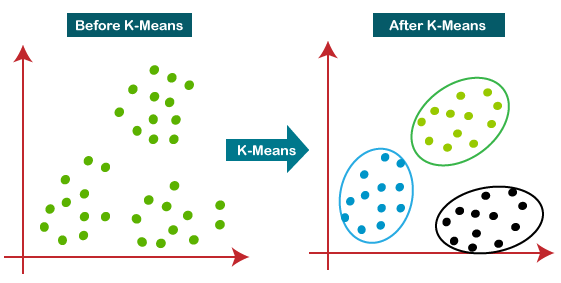

In [ ]:
IPython.display.Image("K-Means-Objective.png")

The algorithm for making the clusters is provided below:
- Initialization: Choose K initial centroids (data points representing cluster centers) randomly from the dataset.

- Assignment: Assign each data point to the nearest centroid, forming K clusters.

- Update Centroids: Recalculate the centroids of the newly formed clusters based on the mean positions.

- Repeat: Repeat steps 2 and 3 until convergence. Convergence occurs when the centroids no longer change significantly or when a predetermined number of iterations is reached.

The algorithm aims to minimize the sum of squared distances between data points and their assigned cluster centroids. In simpler terms, it's trying to make the clusters as compact and close to their centroids as possible.



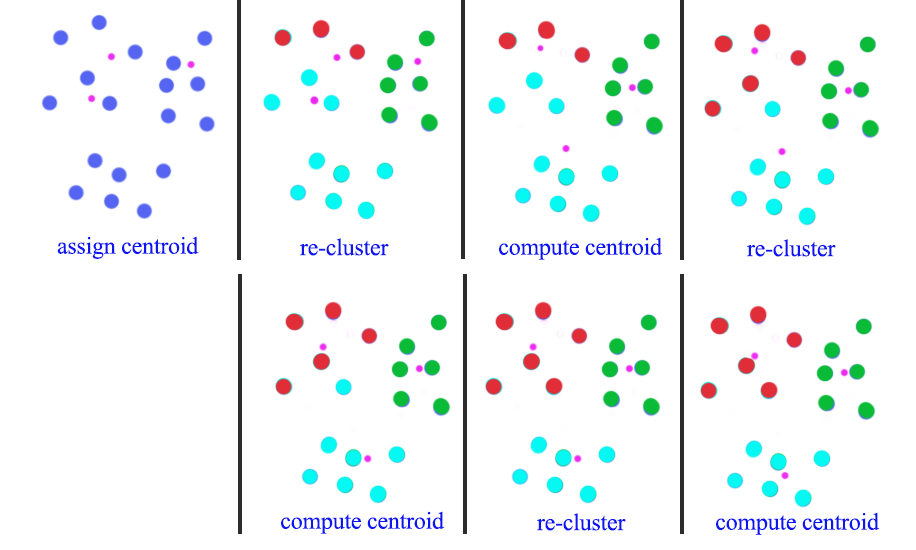

In [ ]:
IPython.display.Image("K-Means-Algorithm.png", width=600)

Although they sound similar, there are key differences between K-means and K-Nearest Neighbors.

KNN (K-Nearest Neighbors) is a supervised learning algorithm for making predictions based on the majority class of neighboring data points.

On the other hand, K-means is an unsupervised learning algorithm that groups similar data points into clusters without labeled examples, aiming to discover natural structures within the data.

KNN is about prediction with labeled data, while K-means is about finding patterns in unlabeled data through clustering.

Let's do an example of K-means Clustering through Scikit-learn and the Customer Personality Analysis dataset from Kaggle.

Customer personality analysis helps a business to modify its product based on its target customers from different customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

A business would use clustering algorithms to analyze customer data and create groups/segments from them, identifying patterns and similarities among customers based on features such as purchasing behavior, preferences, demographics, or any relevant attributes.

With these insights, the business can customize its marketing strategies for each customer segment. Instead of adopting a one-size-fits-all approach, the company can design targeted campaigns that resonate with the preferences and needs of each segment.



In [ ]:
customer_marketing = pd.read_csv("customer_marketing.csv", sep="\t")
customer_marketing.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [ ]:
customer_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# MntWines: Amount spent on wine in last 2 years

customer_marketing["MntWines"].value_counts()

2       42
5       40
1       37
6       37
4       33
        ..
806      1
61       1
986      1
1230     1
428      1
Name: MntWines, Length: 776, dtype: int64

First, let's do some basic data preprocessing. We will also pick out some features to use in clustering, for simplicity.

In [ ]:
X = customer_marketing[["MntMeatProducts", "MntWines"]]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


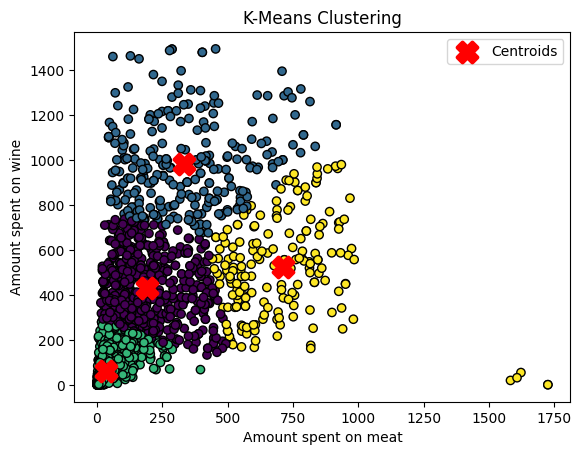

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Choose the number of clusters (k)
k = 4

# Create a KMeans instance
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Add cluster labels to your dataset if needed
# For example, if you have a pandas DataFrame:
# df['cluster'] = labels

# Visualize the clusters (for 2D data)
plt.scatter(X['MntMeatProducts'], X['MntWines'], c=labels, cmap='viridis', edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, linewidths=3, color='r', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Amount spent on meat')
plt.ylabel('Amount spent on wine')
plt.legend()
plt.show()

### Part 2.2.3: Dimensionality Reduction

Dimensionality reduction is a technique used to reduce the number of features (or dimensions) in a dataset while retaining as much of the original information as possible.

The primary purposes of dimensionality reduction include:

- Simplification: High-dimensional data can be challenging to visualize and analyze. Dimensionality reduction helps simplify the data, making it easier to understand and interpret.

- Noise Reduction: It can eliminate irrelevant features, improving the performance of machine learning models by focusing on the most important information.

- Computational Efficiency: Working with fewer dimensions speeds up the training and execution of machine learning algorithms, which is crucial for large datasets.

Two common techniques for dimensionality reduction are Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE).

#### Part 2.2.4: Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a dimensionality reduction technique that aims to transform a high-dimensional dataset into a new coordinate system, where the axes are the principal components—linear combinations of the original features.

There's a lot of math & linear algebra involved in this, but here are the general steps for PCA:

- PCA usually starts with standardizing the features to have a mean of 0 and a standard deviation of 1.

- Covariance Matrix: PCA computes the covariance matrix of the standardized data. This matrix describes the relationships between different features.

- Eigenvalue Decomposition: Through applying math (eigenvectors and eigenvalues) on the Covariance Matrix, PCA identifies the most important directions, called principal components, in the data.

- Selecting Principal Components: Choose the principal components that capture the most variance in the data.

- Projection: Project the data onto the selected principal components, effectively reducing the dimensionality.

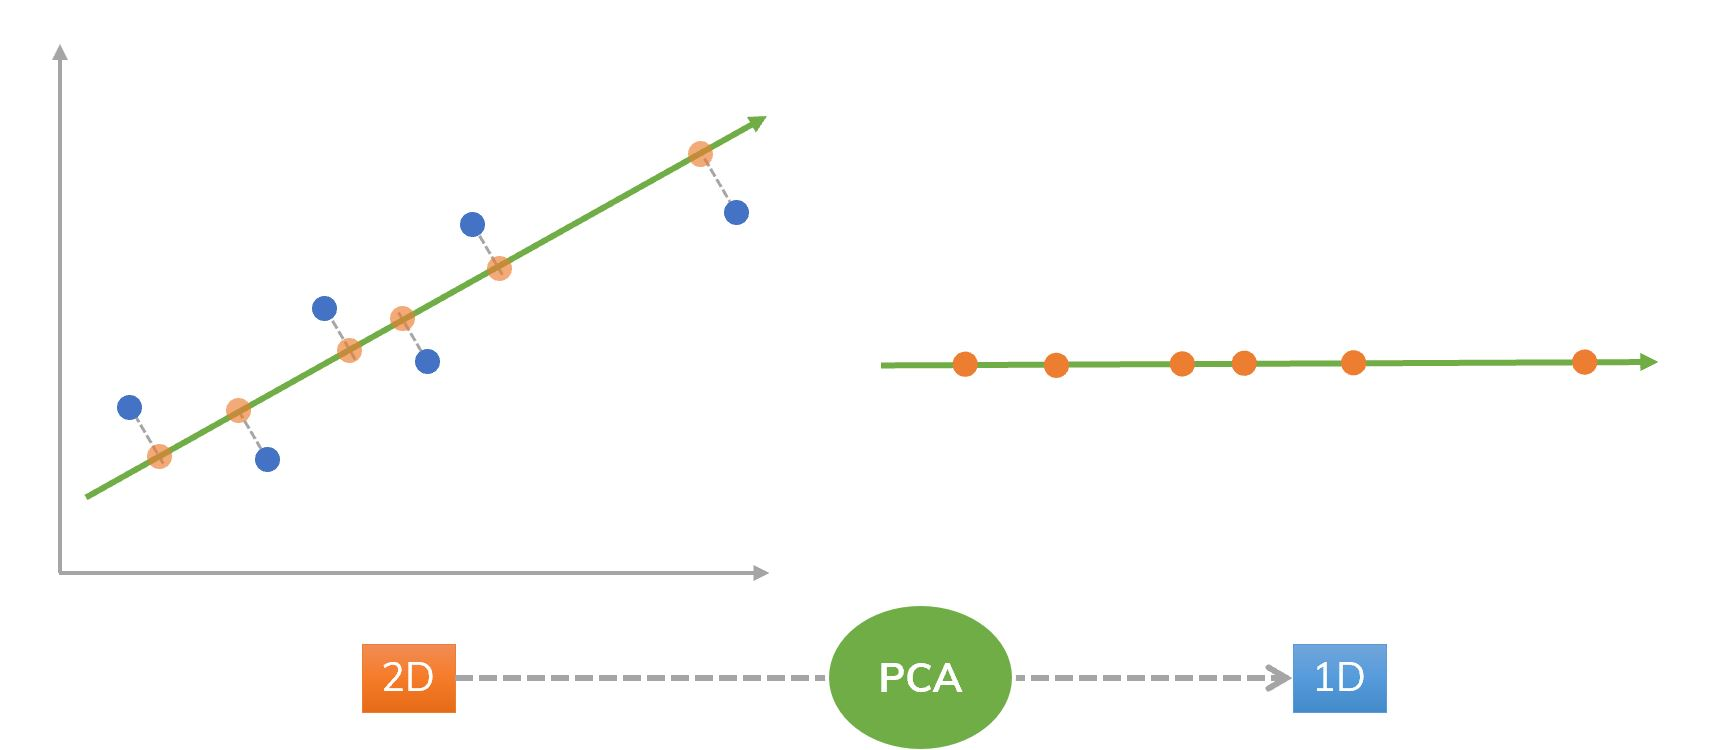

In [ ]:
IPython.display.Image("PCA.jpg", width=800)

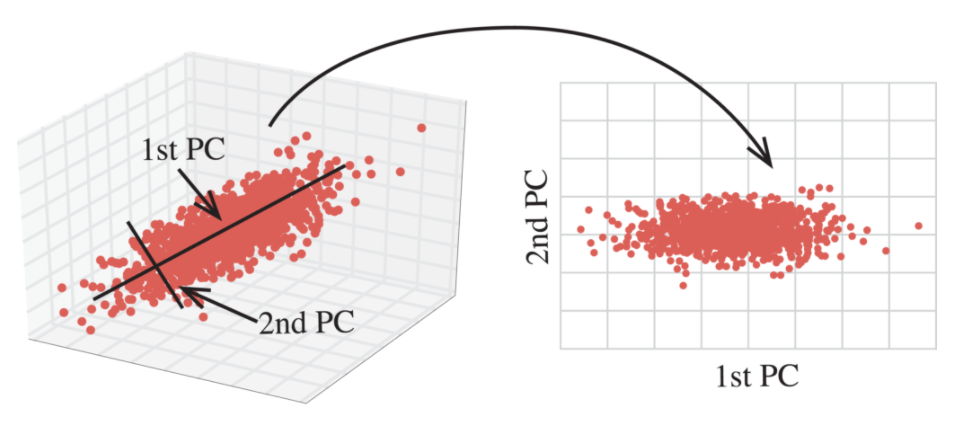

In [ ]:
IPython.display.Image("PCA-2.png", width=800)

Let's do an example of its implementation using Scikit-learn and the Iris dataset. The original dataset has 4 features/dimensions.

In the example code provided, ```n_components = 2``` means that the algorithm will project the original data into a 2D space, capturing the most significant variations in the data. This 2D representation is a compressed version of the original features (from 4D).

Explained Variance Ratio: [0.92461872 0.05306648]
Cumulative Variance Ratio: 0.977685206318795


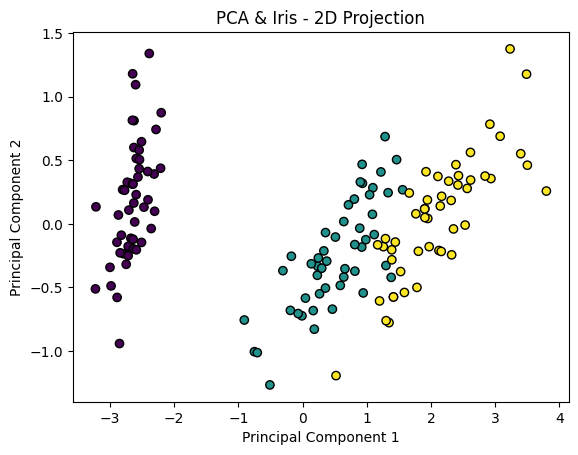

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris  # You can replace this with your dataset

# Load the dataset
iris = load_iris()
X = iris.data  # Assuming X is your feature matrix

# Choose the number of components (dimensionality reduction)
n_components = 2

# Create a PCA instance
pca = PCA(n_components=n_components)

# Fit the model to the data and transform the data
X_pca = pca.fit_transform(X)

# If you want to see the explained variance ratio for each component
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

print("Cumulative Variance Ratio:", np.sum(pca.explained_variance_ratio_))

# Visualize the transformed data (for 2D data)
# Different colors represent different types of the irises
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target, cmap='viridis', edgecolor='k')
plt.title('PCA & Iris - 2D Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


The explained variance ratio indicates the proportion of the dataset's total variance that is captured by each principal component. In other words, it tells you how much information (variance) is retained by each principal component.

A principal component with a high explained variance ratio retains a significant amount of information from the original data.

A principal component with a low explained variance ratio captures less information.

The cumulative sum of the explained variance ratio gives you an idea of how much total variance is retained as you increase the number of components.

If you have components with low explained variance ratios, you might consider using more components to retain a higher percentage of the overall variance.


Although in our example, compressing to 2 dimensions already retains a significant amount of information, we can see what happens when we add another principal component.

The following code adds a third principal component, and we can see the impacts on dimension and the variance captured.





Explained Variance Ratio: [0.92461872 0.05306648 0.01710261]
Cumulative Variance Ratio: 0.9947878161267247


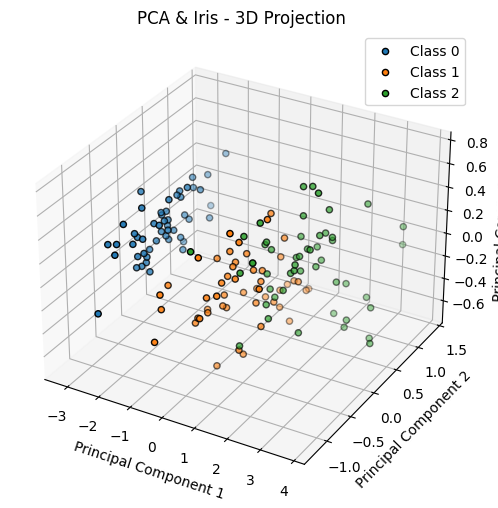

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plotting tools
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()
X = iris.data

# Choose the number of components (3 for 3D)
n_components = 3

# Create a PCA instance
pca = PCA(n_components=n_components)

# Fit the model to the data and transform the data
X_pca = pca.fit_transform(X)

# If you want to see the explained variance ratio for each component
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

print("Cumulative Variance Ratio:", np.sum(pca.explained_variance_ratio_))


# Visualize the transformed data in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each class
for c in np.unique(iris.target):
    idx = iris.target == c
    ax.scatter(X_pca[idx, 0], X_pca[idx, 1], X_pca[idx, 2], label=f'Class {c}', edgecolor='k')

ax.set_title('PCA & Iris - 3D Projection')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

plt.show()

Keep in mind that, at some point, adding more components might not significantly increase the explained variance, and you'll need to decide on an appropriate trade-off between dimensionality reduction and retaining enough information.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy without PCA: 0.97
Accuracy with PCA: 0.98


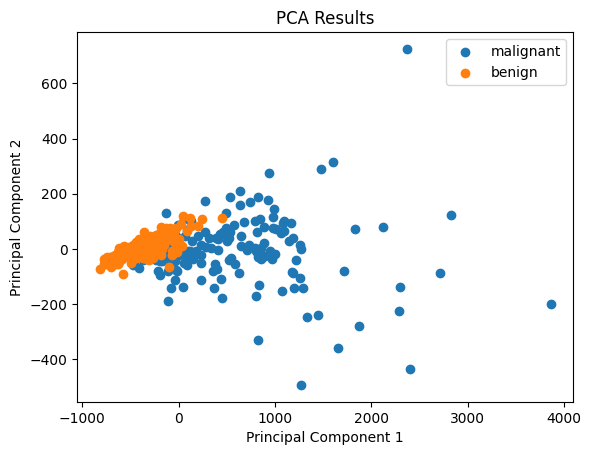

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
accuracy_original = logistic_model.score(X_test, y_test)
print(f'Accuracy without PCA: {accuracy_original:.2f}')

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_pca, y_train)
accuracy_pca = logistic_model.score(X_test_pca, y_test)
print(f'Accuracy with PCA: {accuracy_pca:.2f}')

for target, label in enumerate(data.target_names):
    plt.scatter(X_train_pca[y_train == target, 0], X_train_pca[y_train == target, 1], label=label)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results')
plt.legend()
plt.show()

## Part 2.3: Neural Networks

Neural networks are a class of machine learning models inspired by the structure and functioning of the human brain. They consist of interconnected nodes, or neurons, organized into layers.

Each neuron applies a transformation to its input and passes the result to the next layer. Through training, neural networks learn to adjust the strength of connections between neurons to minimize the difference between their predicted outputs and the true labels of the input data.

This optimization process typically involves techniques like backpropagation and gradient descent (beyond the scope of this workshop). Neural networks are capable of learning complex patterns and relationships from data, making them versatile tools for tasks such as classification, regression, and pattern recognition in various domains.

There are many types of neural networks, but here's the basic structure:


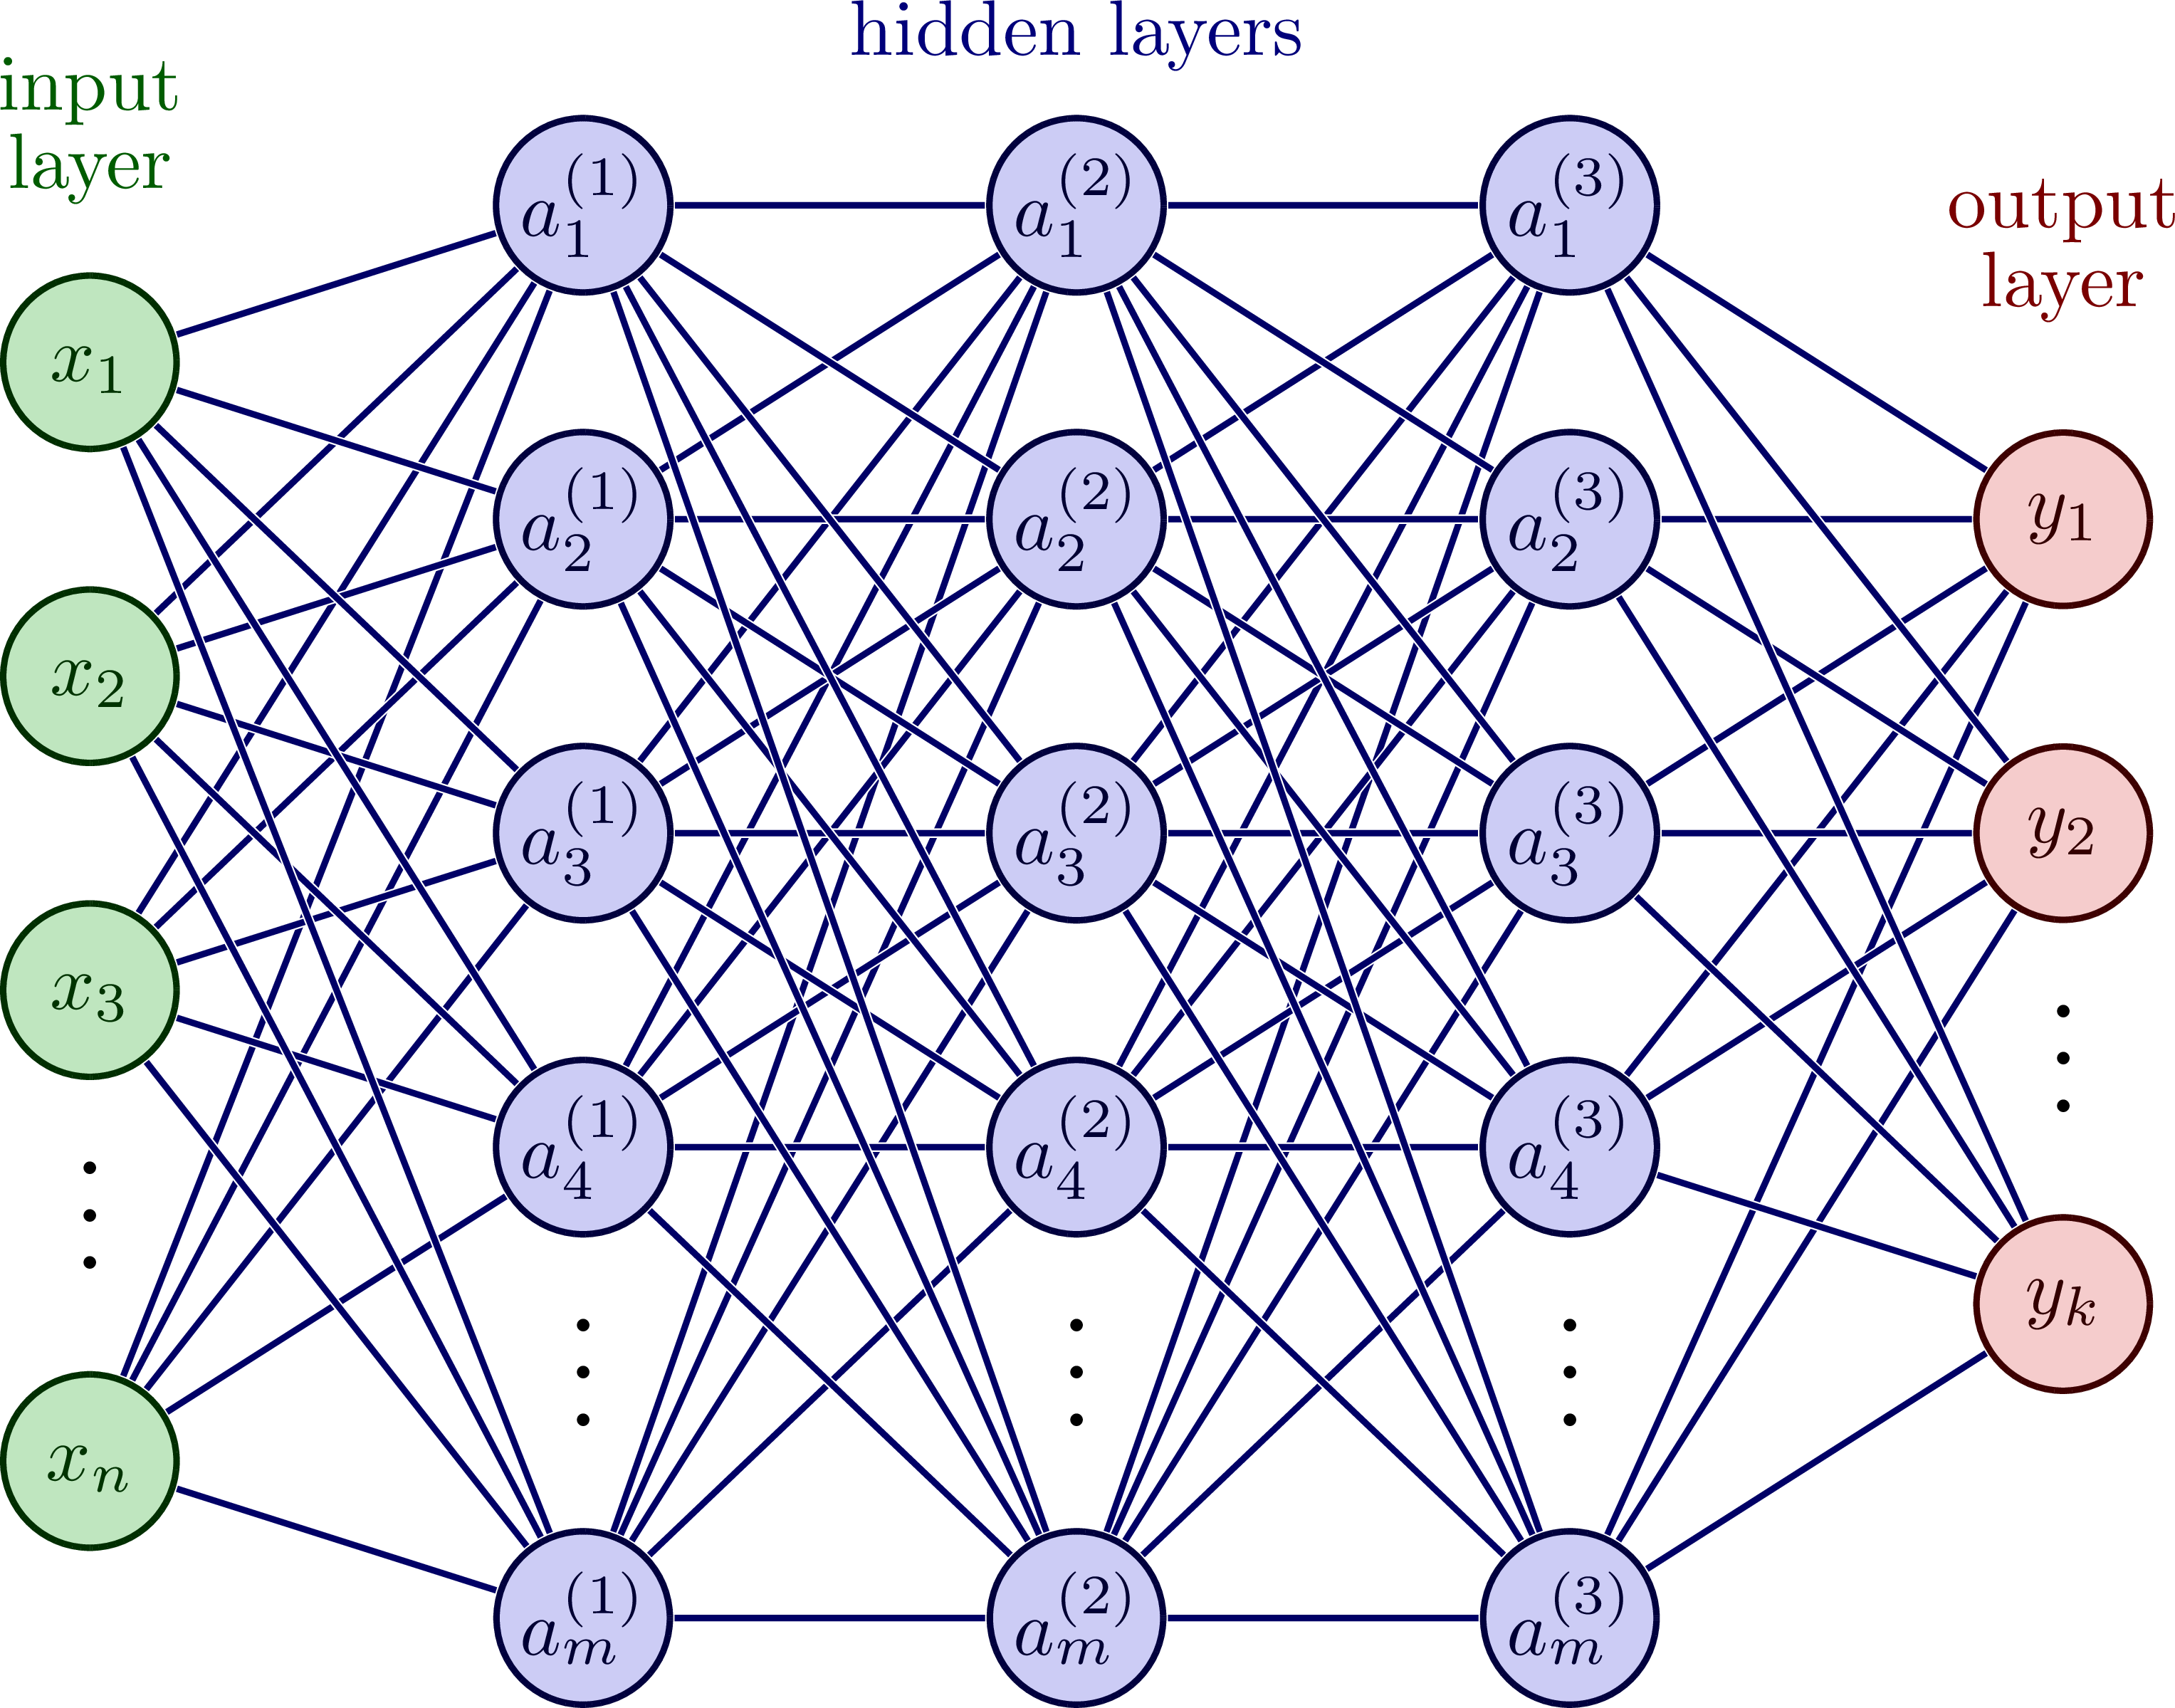

In [ ]:
IPython.display.Image("neural_networks.png", width=600)

The following in an example of a Convolutional Neural Network (CNN), which is commonly used with images, such as handwriting detection or object recognition.

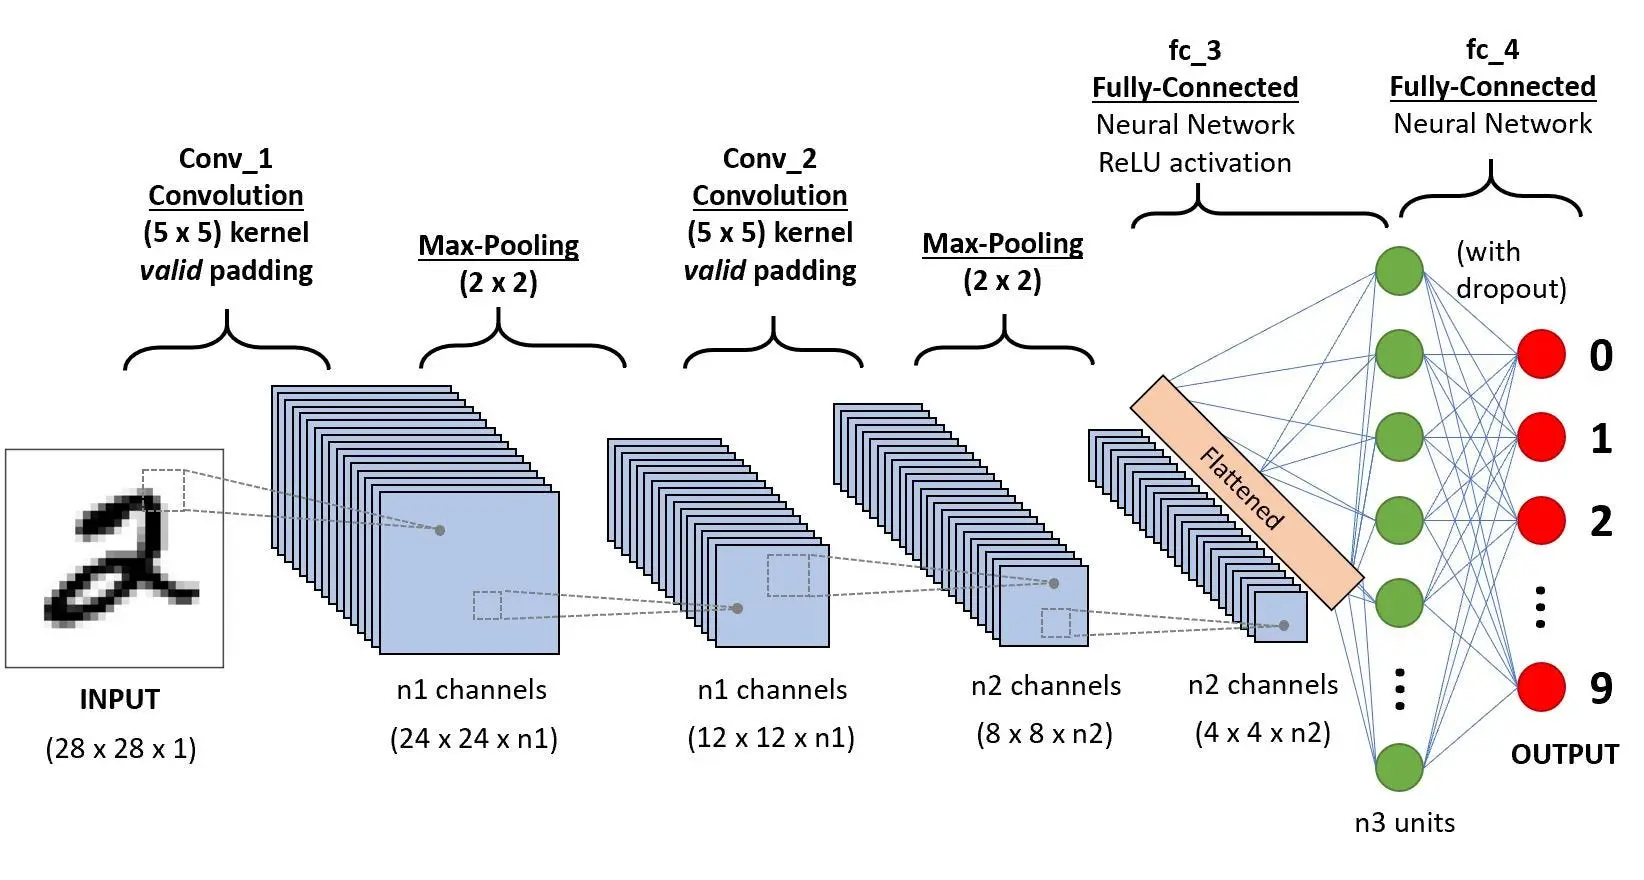

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 48s 111ms/step - loss: 0.3639 - accuracy: 0.8899 - val_loss: 0.0809 - val_accuracy: 0.9777
Epoch 2/15
422/422 [==============================] - 59s 140ms/step - loss: 0.1091 - accuracy: 0.9671 - val_loss: 0.0582 - val_accuracy: 0.9843
Epoch 3/15
422/422 [==============================] - 47s 110ms/step - loss: 0.0814 - accuracy: 0.9749 - val_loss: 0.0458 - val_accuracy: 0.9887
Epoch 4/15
422/422 [==============================] - 45s 106ms/step - loss: 0.0716 - accuracy: 0.9783 - val_loss: 0.0430 - val_accuracy: 0.9885
Epoch 5/15
422/422 [==============================] - 45s 106ms/step - loss: 0.0606 - accuracy: 0.9814 - val_loss: 0.0383 - val_accuracy: 0.9897
Epoch 6/15
422/422 [==============================] - 46s 108ms/step - loss: 0.0558 - accuracy: 0.9824 - val_loss: 0.0359 - val_accuracy: 0.9910
Epoch 7/15
422/422 [==============================] - 47s 110ms/step - loss: 0.0514 - accuracy: 0.9837 - val_loss: 0.0361 - val_ac

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.025844721123576164
Test accuracy: 0.9911999702453613


In [ ]:
#Credit: https://keras.io/examples/vision/mnist_convnet/

# Part 3: Model Optimization & Techniques

Optimization involves the process of fine-tuning a model to achieve the best possible performance. This includes adjusting parameters, selecting appropriate algorithms, and refining the model architecture. The goal is to enhance predictive accuracy, reduce errors, and improve overall efficiency.



## Part 3.1: Overfitting

Overfitting occurs when a model learns the training data too well, capturing noise and anomalies that don't generalize to new, unseen data. As a result, the test set accuracy will remain poor despite extremely good training accuracy.

In scikit-learn, you can check for overfitting by evaluating your model's performance on both the training set and a separate validation or test set. If the training accuracy is significantly higher than the test accuracy, it suggests overfitting.

When using cross-validation techniques (e.g., K-fold cross-validation), if there's a significant discrepancy between cross-validated performance and the training set performance, it may indicate overfitting.


In the example below with the wine dataset, we use a random forest model for classification. An important hyperparameter of random forests is the ```n_estimators```, which tells us how many decision trees to aggregate. (Setting ```n_estimators``` to 1 means the model uses 1 estimator, which essentially makes it decision tree).

Initially, when we use multiple trees, it helps "neutralize" the overfitting of a single tree, which helps improve testing accuracy and therefore model generalization to new data.

In [ ]:
# Import necessary libraries and the wine dataset
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForestClassifier
#### Test out different values of n_estimators ####
rf_model = RandomForestClassifier(n_estimators=13, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate on the training set (make predictions using the training set after training)
train_accuracy = accuracy_score(y_train, rf_model.predict(X_train))
print(f"Training Accuracy: {train_accuracy:.2f}")

# Evaluate on the test set
test_accuracy = accuracy_score(y_test, rf_model.predict(X_test))
print(f"Test Accuracy: {test_accuracy:.2f}")


Training Accuracy: 1.00
Test Accuracy: 1.00


There are many ways to address overfitting, and the best courses of action will depend on the dataset you are using and other circumstances/constraints. Here are some common ways to deal with overfitting:

- Train with More Data: Increase the size of your training dataset, as more data can help the model generalize better.

- Feature Selection: Select relevant features and avoid using too many irrelevant or redundant ones.

- Regularization: Apply regularization techniques (e.g., L1 or L2 regularization) to penalize overly complex models.

- Use Simpler Models: Choose simpler models with fewer parameters, especially if your dataset is not large.

- Ensemble Methods: Use ensemble methods like Random Forests or Gradient Boosting, which can reduce overfitting by combining multiple weak learners.

- Dropout (for Neural Networks): Apply dropout regularization in neural networks to randomly deactivate neurons during training, preventing reliance on specific neurons.

- Early Stopping: Monitor the model's performance on a validation set during training and stop when the performance starts degrading.

- Hyperparameter Tuning: Tune hyperparameters carefully, as they can significantly impact a model's performance.

## Part 3.2: Hyperparameter Tuning

Hyperparameter tuning focuses on finding the optimal values for parameters that are not learned during the training process. These parameters, often set before training begins, significantly impact a model's performance.

Many hyperparameters are specific to a certain model, so they may not be applicable to others.

A few hyperparameters are listed below:

- Learning Rate: Determines the step size during optimization, influencing how much the model's parameters are updated.
- Regularization Parameters: Control the impact of regularization techniques like L1 or L2 regularization.
- Activation Functions: Choices like sigmoid, tanh, or ReLU, influencing the output of each neuron for neural networks.
- Number of Hidden Units or Layers: Architecture-related hyperparameters influencing the depth and width of the neural network.
- K in k-Nearest Neighbors (k-NN): The number of neighbors considered when making predictions.
- n_estimators and max_depth in Random Forests: Number of trees in the forest and the maximum depth of individual trees.
- K and p in k-Means Clustering: Number of clusters (K) and the distance metric (p) used.
- C and Kernel in Support Vector Machines (SVM): C controls the trade-off between smooth decision boundaries and classifying training points correctly, while the kernel defines the decision boundary shape.

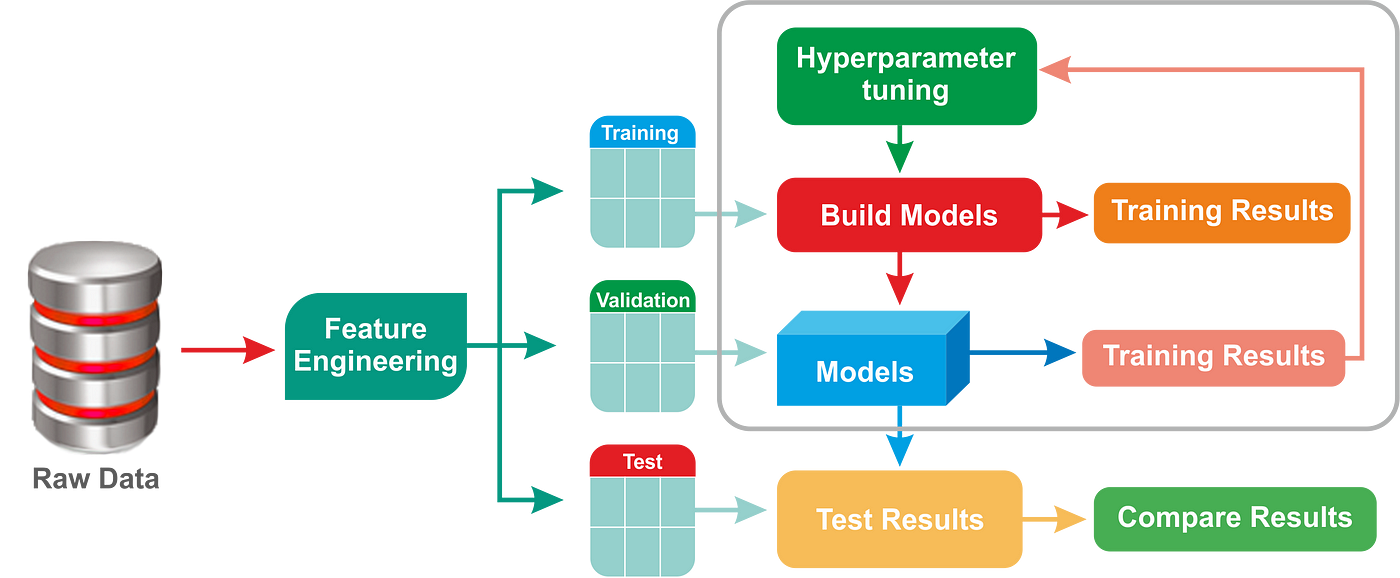

In [ ]:
IPython.display.Image("Process.png", width=1000)

### Part 3.2.1: Grid Search

There are various ways to systematically perform hyperperameter tuning. Grid search is a hyperparameter tuning technique where a predefined grid of hyperparameter values is systematically explored to find the optimal combination for a model.

This exhaustive search involves training and evaluating the model with each unique set of hyperparameters, typically using cross-validation to assess performance. The goal is to identify the combination that maximizes a chosen scoring metric. (think brute force)

While grid search ensures a thorough exploration of the hyperparameter space, it can be computationally expensive, especially for large search spaces. You can do this manually with a predefined set of values or use tools like Scikit-learn's ```GridSearchCV``` automate the process.

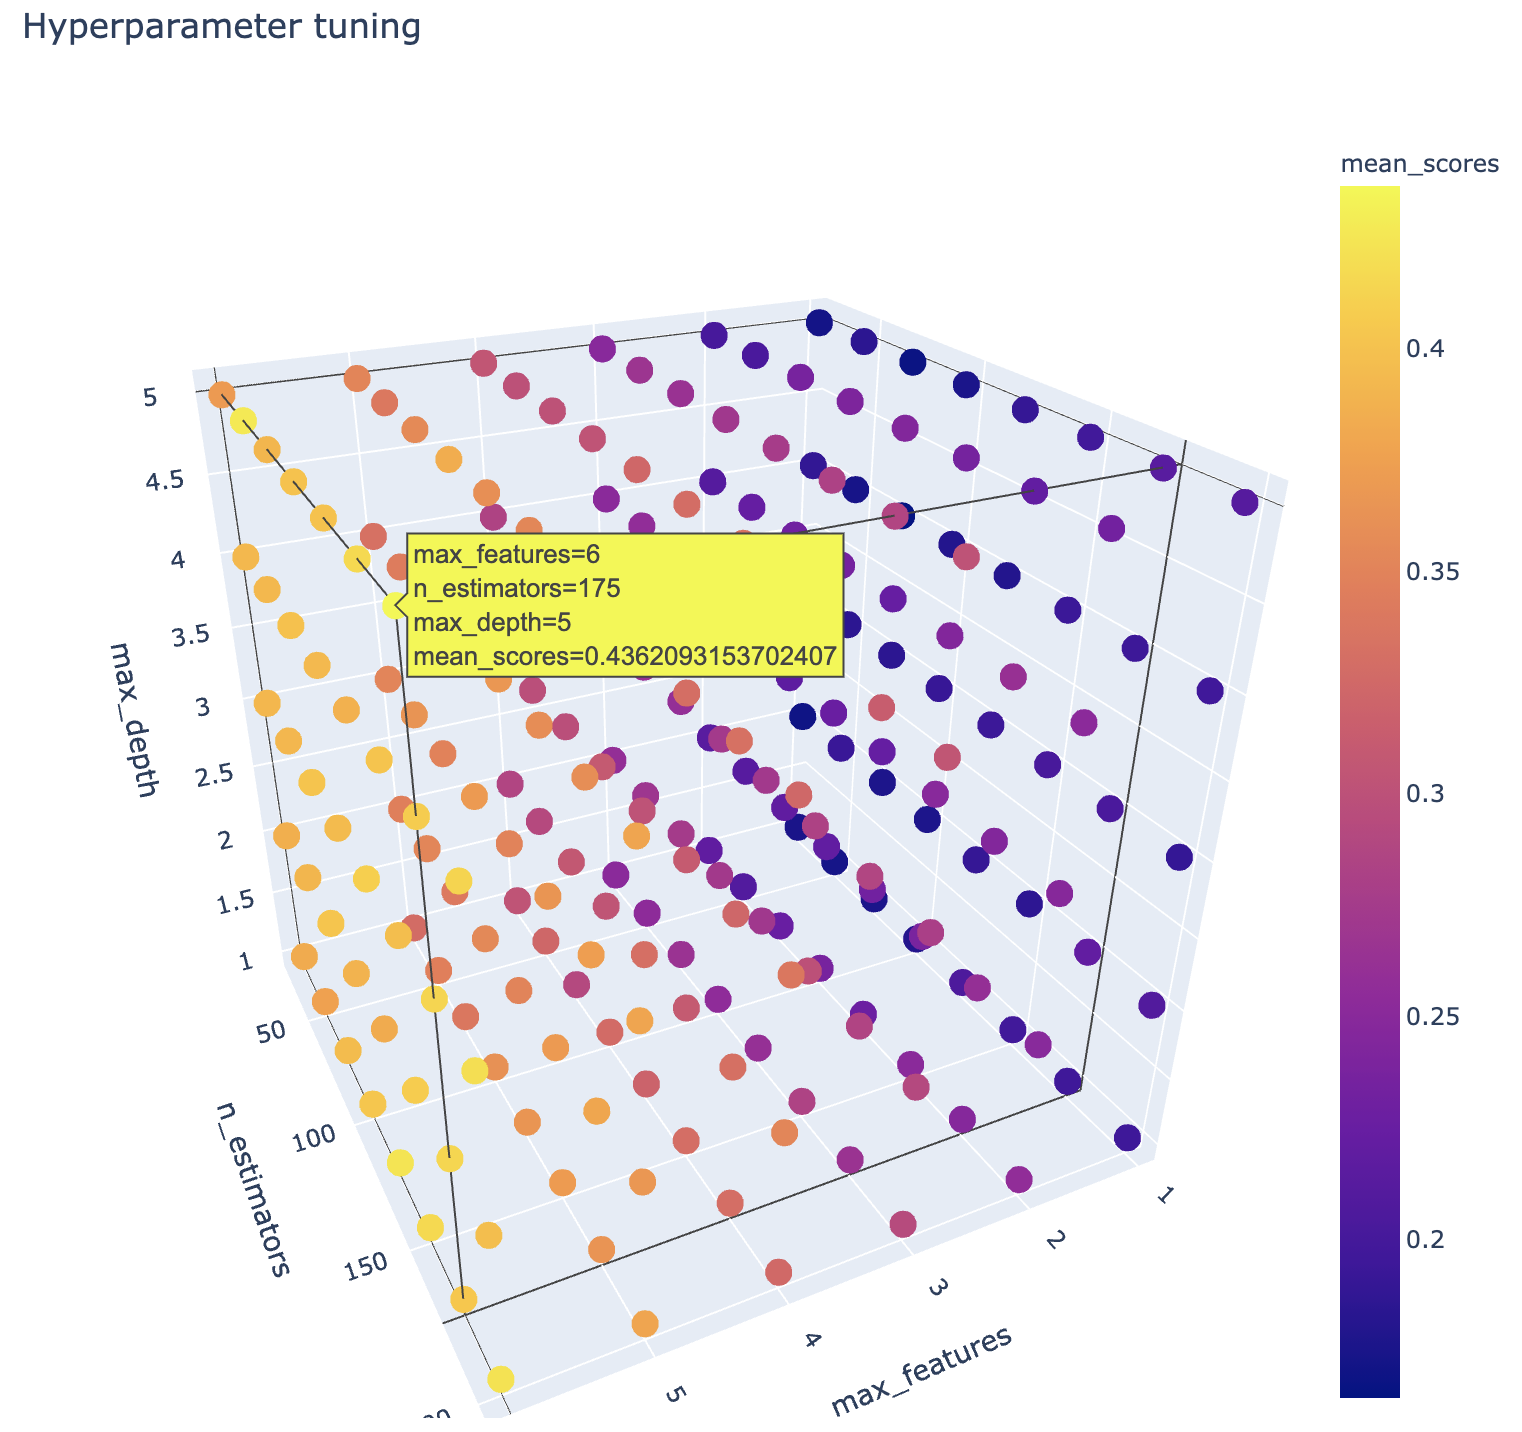

In [ ]:
IPython.display.Image("grid_search.png", width=500)

### Part 3.2.2: Regularization

Regularization is a technique used to prevent overfitting.

Regularization introduces a penalty term to the model's objective function, discouraging overly complex models that fit the training data too closely. Some examples include:

- L1 Regularization (Lasso): Adds the sum of the absolute values of the model parameters to the objective function. It encourages sparsity in the model by driving some weights to exactly zero, effectively selecting a subset of features.

- L2 Regularization (Ridge): Adds the sum of the squared values of the model parameters to the objective function. It penalizes large weights, preventing the model from becoming too sensitive to small changes in the input data.

- Dropout is a regularization technique primarily associated with neural
 networks, especially deep learning models. It involves randomly "dropping out" (i.e., setting to zero) a fraction of input units during training to prevent overfitting. By doing so, dropout helps prevent the network from relying too much on specific neurons

Regularization can cause underfitting when the regularization strength is too high, preventing it from capturing the underlying patterns in the training data.

In the case of L1 or L2 regularization, high penalty values can force the model parameters (weights) to be very small or even zero, effectively simplifying the model. This oversimplification may lead to underfitting, where the model is too rigid and fails to capture the complexities present in the data.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load the Titanic dataset
titanic_data = pd.read_csv("titanic.csv")

# Select relevant columns and handle missing values
selected_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']
titanic_data = titanic_data[selected_columns].dropna()

# Convert categorical variables to numerical using one-hot encoding
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

# Split the data into features (X) and target variable (y)
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model with L1 regularization
logreg = LogisticRegression(penalty='l1', solver='liblinear', C=1, random_state=42)

# Fit the model to the training data
logreg.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
accuracy = logreg.score(X_test_scaled, y_test)
print(f"Accuracy with L1 regularization: {accuracy:.2f}")


# Create a logistic regression model with L2 regularization
logreg_L2 = LogisticRegression(penalty='l2', solver='liblinear', C=1, random_state=42)

# Fit the model to the training data
logreg_L2.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
accuracy = logreg_L2.score(X_test_scaled, y_test)
print(f"Accuracy with L2 regularization: {accuracy:.2f}")


# Compare to without regularization
logreg_baseline = LogisticRegression(solver='liblinear', random_state=42)
logreg_baseline.fit(X_train_scaled, y_train)
accuracy = logreg_baseline.score(X_test_scaled, y_test)
print(f"Accuracy without regularization: {accuracy:.2f}")


Accuracy with L1 regularization: 0.81
Accuracy with L2 regularization: 0.80
Accuracy without regularization: 0.80


For a model like the logistic regression one above, the model is probably not overfitting to begin with, so regularization won't have a huge impact on accuracy results.

## Part 3.3: Cross-Validation

Cross-validation is a technique used in machine learning to assess the performance and generalization ability of a model. It involves splitting the dataset into multiple subsets, or folds, and iteratively training the model on a subset of the data while validating it on the remaining fold.

This process is repeated multiple times, with each fold serving as the validation set exactly once. Cross-validation provides a more reliable estimate of a model's performance compared to a single train-test split, as it reduces the variance that may arise from using a specific partition of the data.

Common methods of cross-validation include k-fold cross-validation, where the dataset is divided into k equal-sized folds, and leave-one-out cross-validation, where each data point is used as a separate validation set.







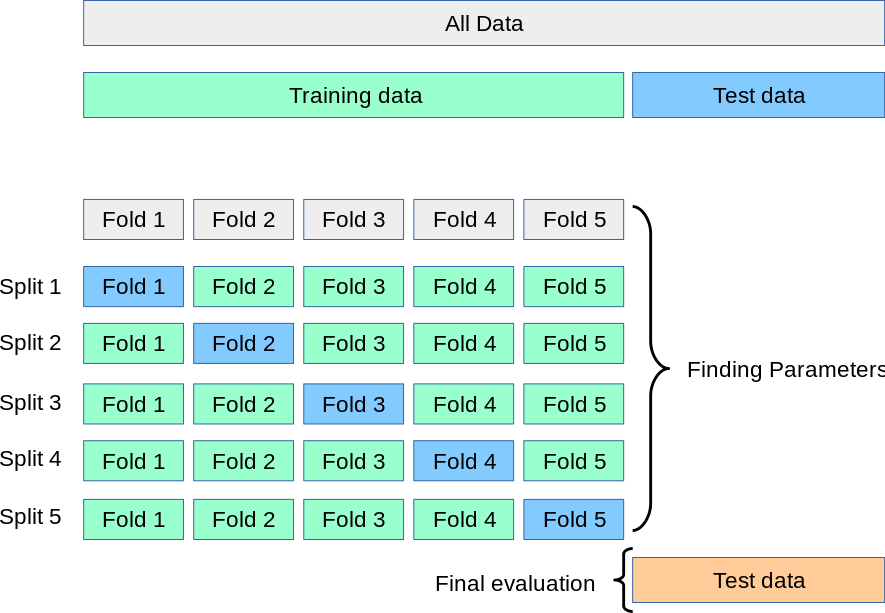

In [ ]:
IPython.display.Image("k_fold_cross_validation.png")

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load Iris dataset from Seaborn
iris = sns.load_dataset('iris')

# Features and target variable
X = iris.drop('species', axis=1)
y = iris['species']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a logistic regression model
model = LogisticRegression()

# Initialize k-fold cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
accuracies = []
for train_index, val_index in k_fold.split(X_train):
    X_fold_train, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_fold_train, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

    # Fit the model
    model.fit(X_fold_train, y_fold_train)

    # Predict
    y_pred = model.predict(X_val)

    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)

# Compute average cross-validation accuracy
average_cv_accuracy = sum(accuracies) / len(accuracies)
print("Average Cross-Validation Accuracy:", average_cv_accuracy)

# Final evaluation on holdout test set
final_pred = model.predict(X_test)
final_accuracy = accuracy_score(y_test, final_pred)
print("Final Test Accuracy:", final_accuracy)


Average Cross-Validation Accuracy: 0.95
Final Test Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Part 4: NHTS Tips

There are more models/techniques not covered, but most likely will not need if beginner- GNN, LSTM, Xgboost, anomaly detection stuff, etc.

If compendium/google scholar study uses one model, you can choose to use that one or do something similar (and any other techniques).

If you want to use neural networks, please familiarize yourself with various aspects and hyperparameters, such as activation functions, optimizers, learning rate, etc. This is more challenging than using a simpler model, and additional learning may take a few hours!

Understanding why something works or is done is more important than memorizing the code (consult documentation or chatGPT if needed).

Here's an article I found on choosing models: https://medium.com/@davidbreton03/a-full-guide-on-choosing-the-right-machine-learning-algorithm-5fa282a0b2a1

Here's another very useful video on how data science is done at GM (and what they expect):
[Click Here :D](https://www.youtube.com/watch?v=dQw4w9WgXcQ)